In [1]:
# Environment setup
# Basic stat/data/plot packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
np.set_printoptions(suppress=True, linewidth=200)
from google.colab import drive # Import drive for mounting Google Drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Classes/MIS 545/data/airlinesatisfaction.545.csv') # Read the 'airlinesatisfaction.545.csv' file into a DataFrame called 'df'
linebreak = '=' * 10

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Make sure we have everything in our environment
# Preprocessing
from sklearn.preprocessing import LabelEncoder

# Pipeline and column transformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer

# Data transformers
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Data splitter and model evaluator
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve

# Learning models (use one of them or any other model)
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import RFECV

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# SHAP
import shap

# Evaluation
from sklearn.metrics import (
    # Classification metrics
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    auc,
    classification_report,
    confusion_matrix,
    matthews_corrcoef,
    cohen_kappa_score,
    log_loss,

    # Regression metrics (if needed)
    mean_squared_error,
    mean_absolute_error,
    r2_score,

    # Multi-class metrics
    precision_recall_fscore_support,
    average_precision_score
)

# **Initial Data Exploration**

In [3]:
print(df.shape)
print(linebreak)
print(df.info())
print(linebreak)


(129880, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Inflight wifi service              129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Ease of Online booking             129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Food and drink            

In [4]:
df.describe()
df.describe(include = 'all')
df.describe(percentiles=[.1, .25, .5, .75, .9])

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,64940.500000,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,37493.270818,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,12988.900000,20.000000,236.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000
25%,32470.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64940.500000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97410.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
90%,116892.100000,59.000000,2751.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,44.000000,44.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [5]:
# Count missing values
missing = df.isnull().sum()
missing_pct = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing,
    'Percentage': missing_pct
}).sort_values('Percentage', ascending=False)
print(missing_df[missing_df['Missing_Count'] > 0])

                          Missing_Count  Percentage
Arrival Delay in Minutes            393    0.302587


In [6]:
# Unique values per column
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

# Value counts for categorical columns
for col in df.select_dtypes(include=['object', 'category']).columns:
    print(f"\n{col}:")
    print(df[col].value_counts().head(10))

# Check for duplicates
print(f"Duplicate rows: {df.duplicated().sum()}")

id: 129880 unique values
Gender: 2 unique values
Customer Type: 2 unique values
Age: 75 unique values
Type of Travel: 2 unique values
Class: 3 unique values
Flight Distance: 3821 unique values
Inflight wifi service: 6 unique values
Departure/Arrival time convenient: 6 unique values
Ease of Online booking: 6 unique values
Gate location: 6 unique values
Food and drink: 6 unique values
Online boarding: 6 unique values
Seat comfort: 6 unique values
Inflight entertainment: 6 unique values
On-board service: 6 unique values
Leg room service: 6 unique values
Baggage handling: 5 unique values
Checkin service: 6 unique values
Inflight service: 6 unique values
Cleanliness: 6 unique values
Departure Delay in Minutes: 466 unique values
Arrival Delay in Minutes: 472 unique values
satisfaction: 2 unique values

Gender:
Gender
Female    65899
Male      63981
Name: count, dtype: int64

Customer Type:
Customer Type
Loyal Customer       106100
disloyal Customer     23780
Name: count, dtype: int64

Type o

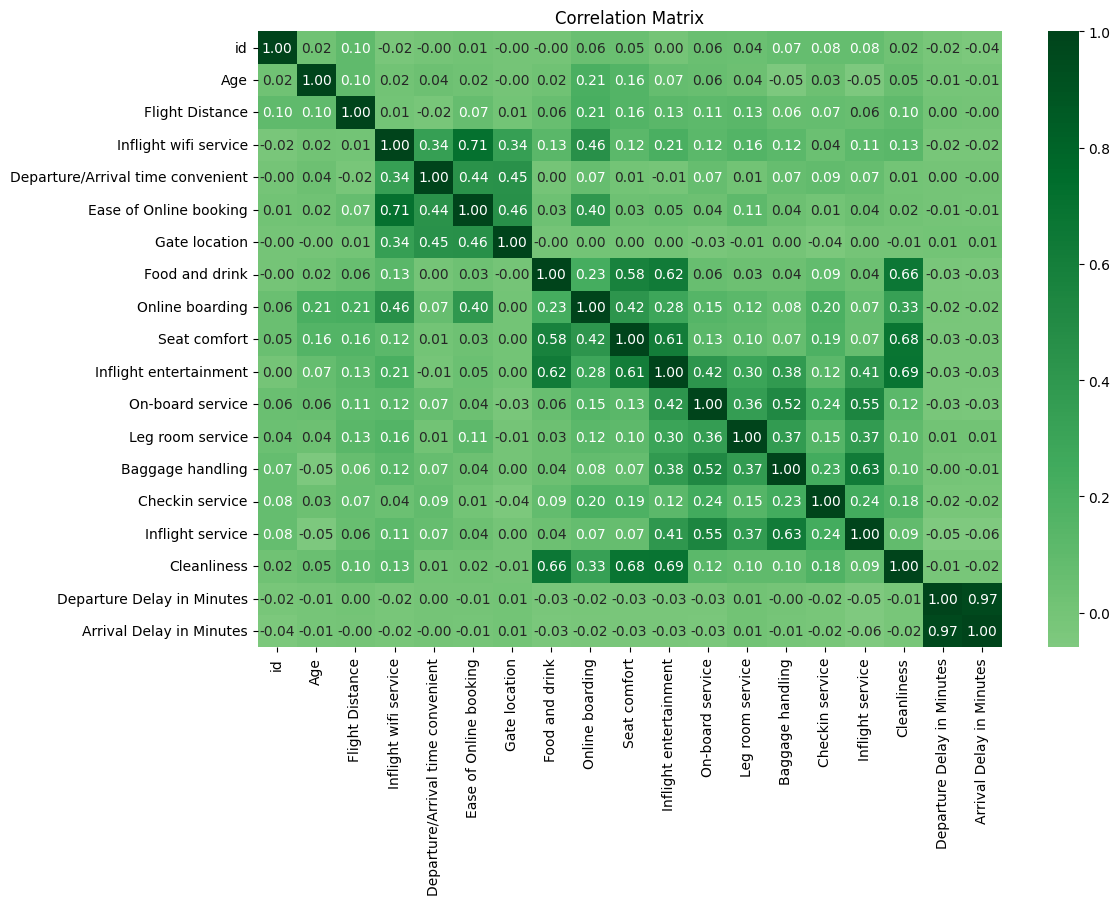

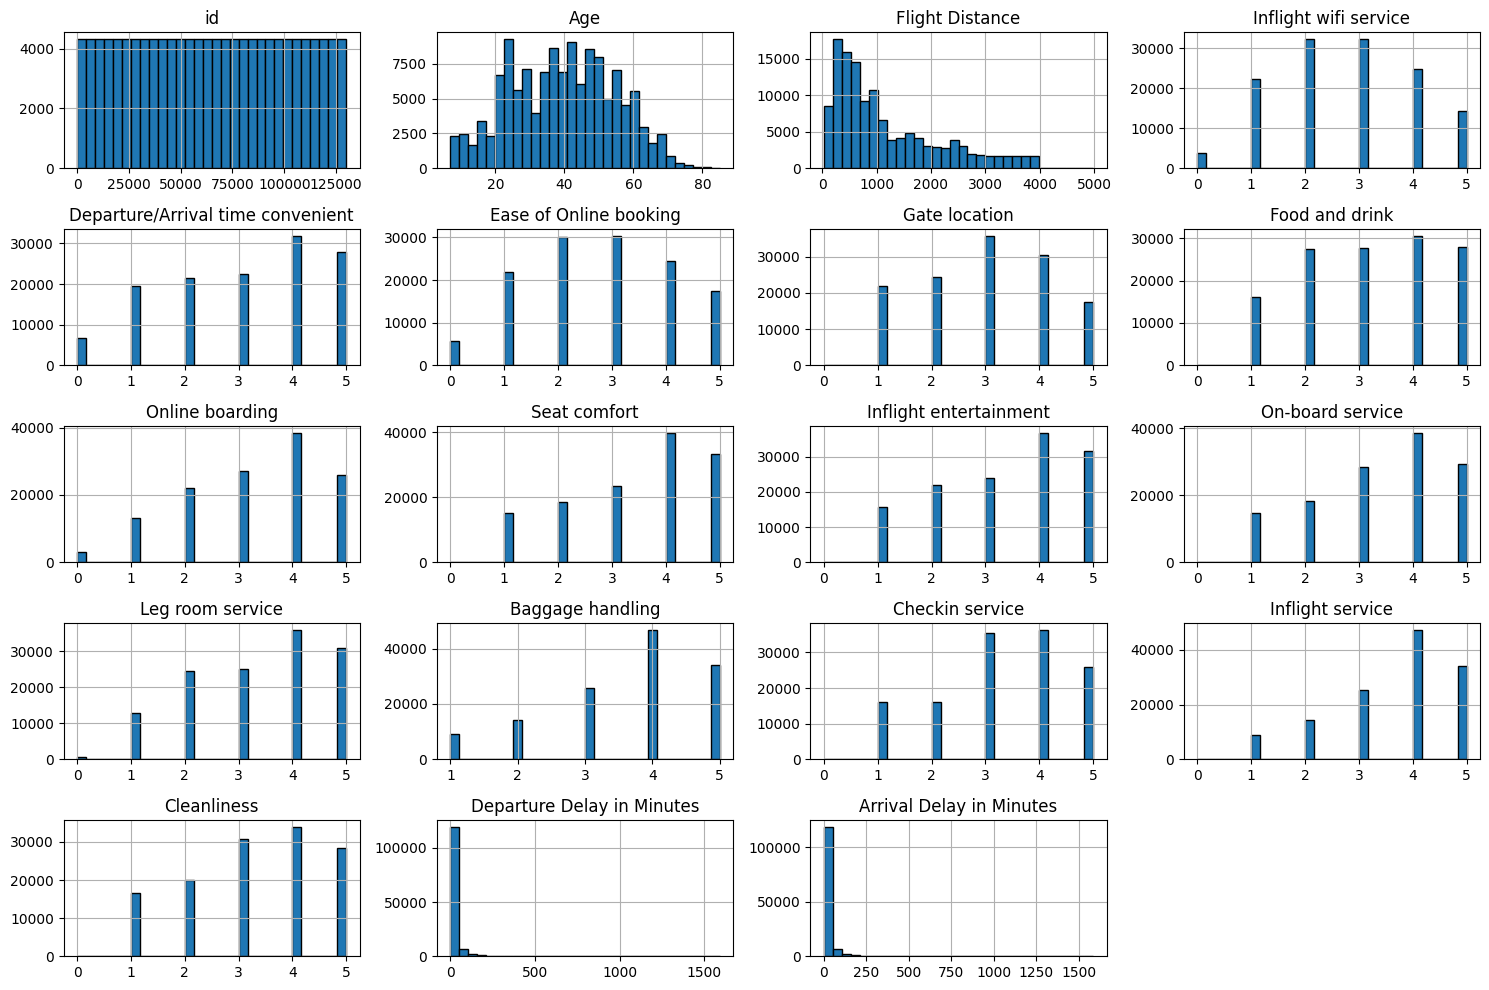

In [7]:
# Correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.select_dtypes(include=['number']).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='Greens', center=0, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Distribution plots
df.hist(figsize=(15, 10), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()

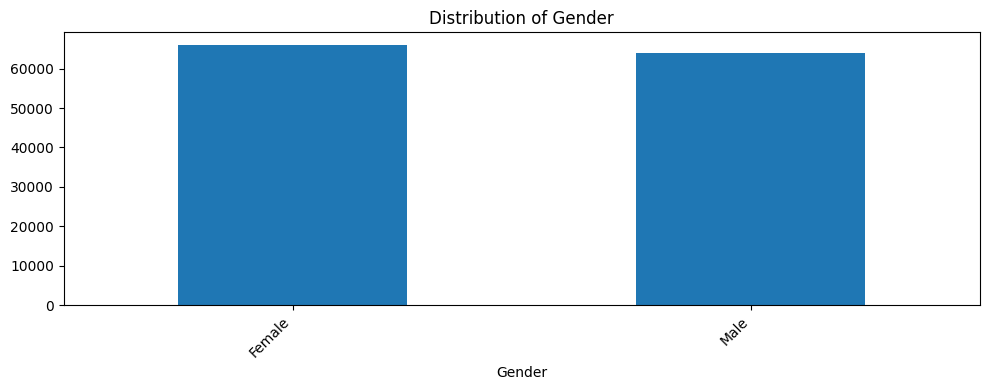

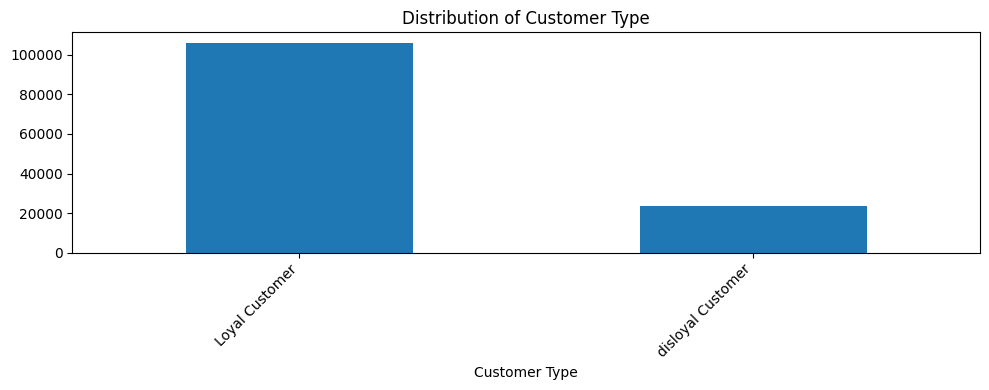

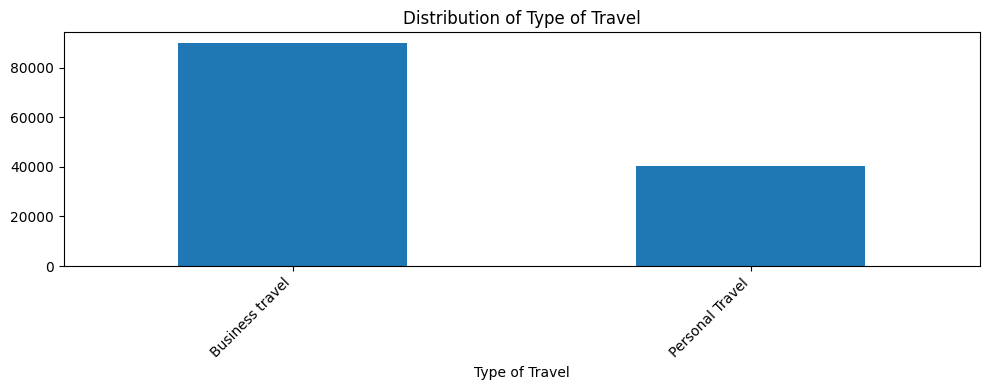

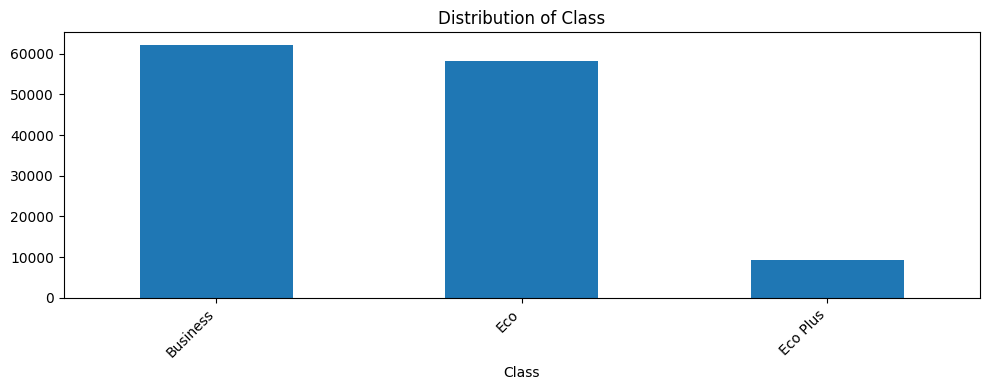

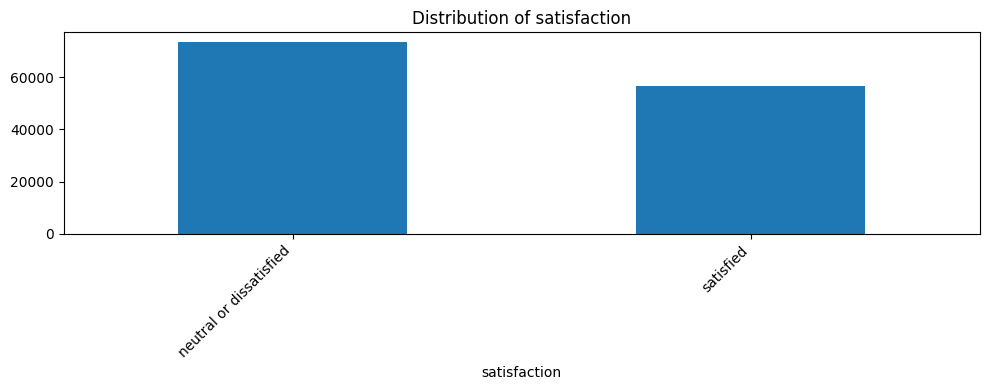

In [8]:
# Bar plots for categorical variables
cat_cols = df.select_dtypes(include=['object', 'category']).columns

for col in cat_cols:
    if df[col].nunique() < 20:  # Only for reasonable number of categories
        plt.figure(figsize=(10, 4))
        df[col].value_counts().plot(kind='bar')
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

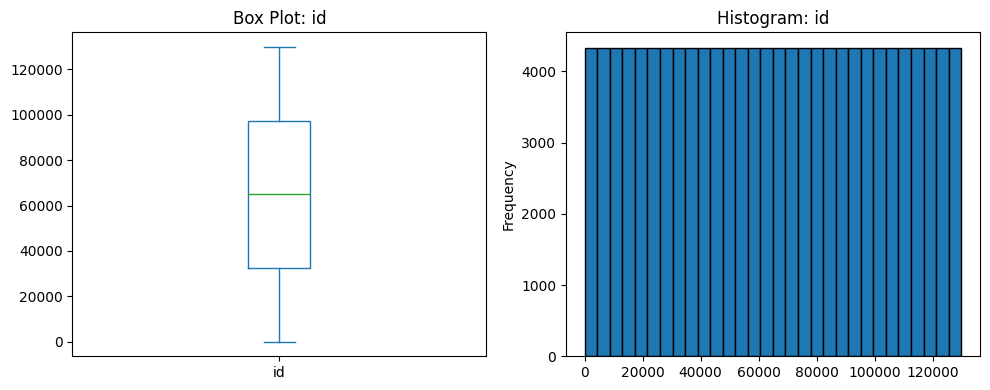

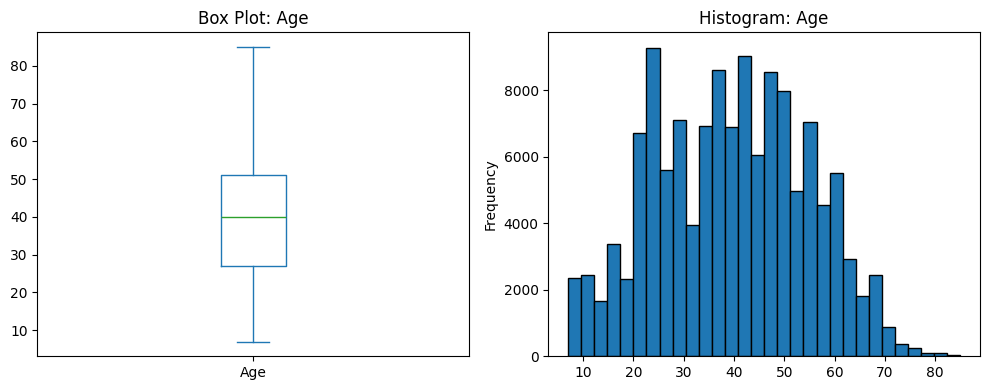

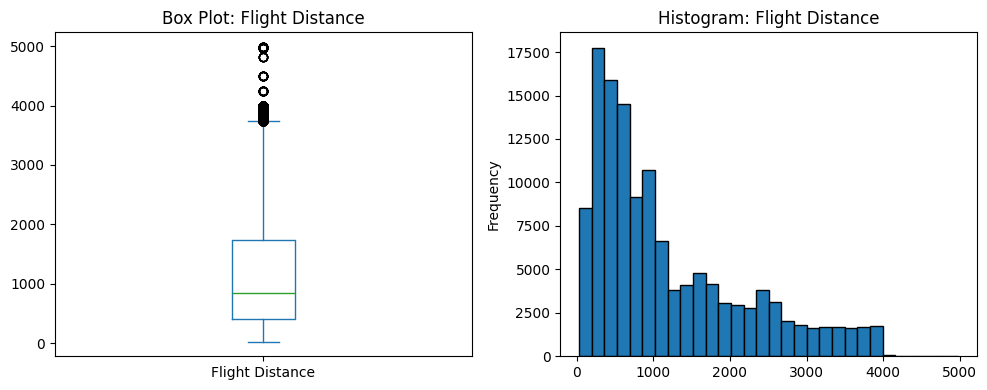

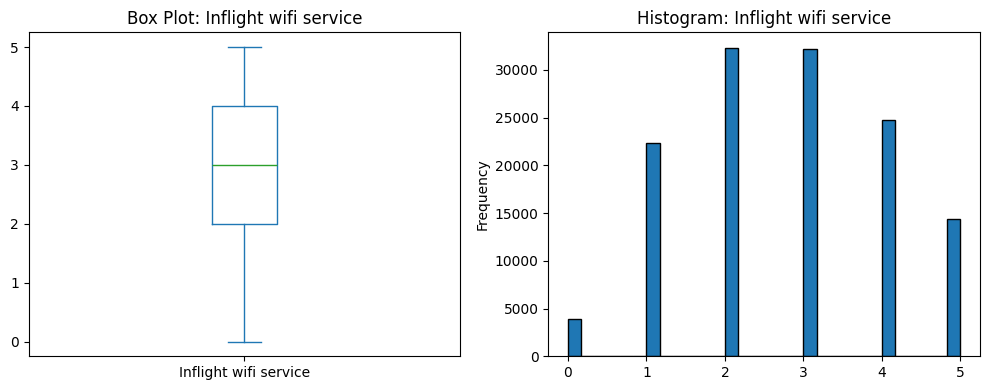

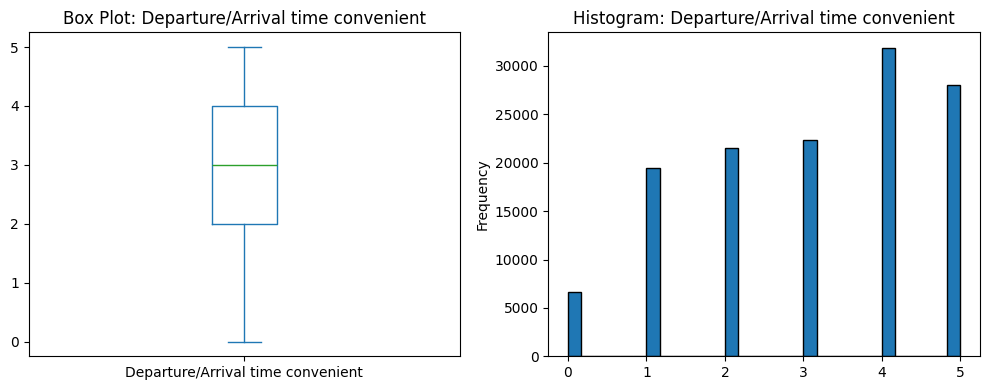

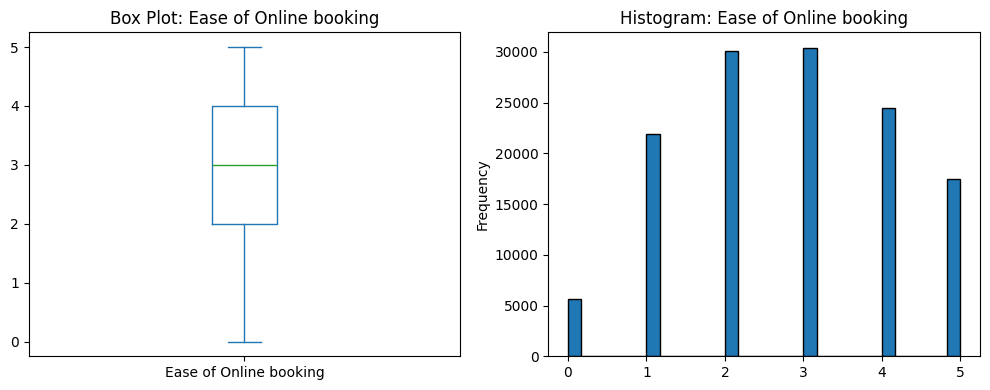

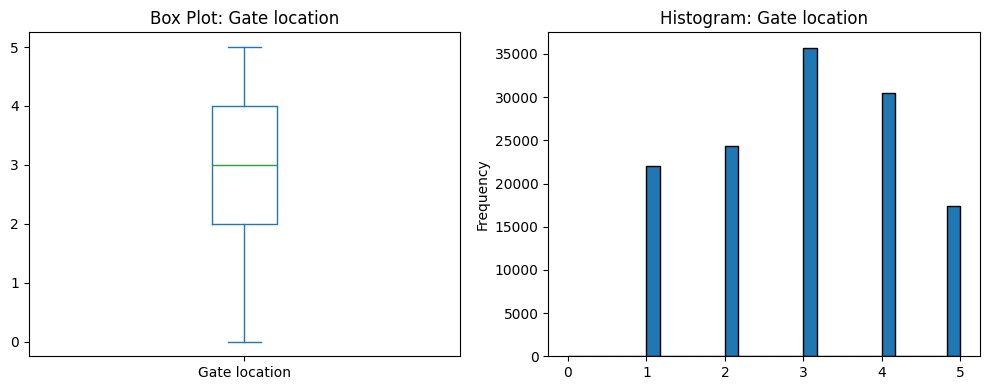

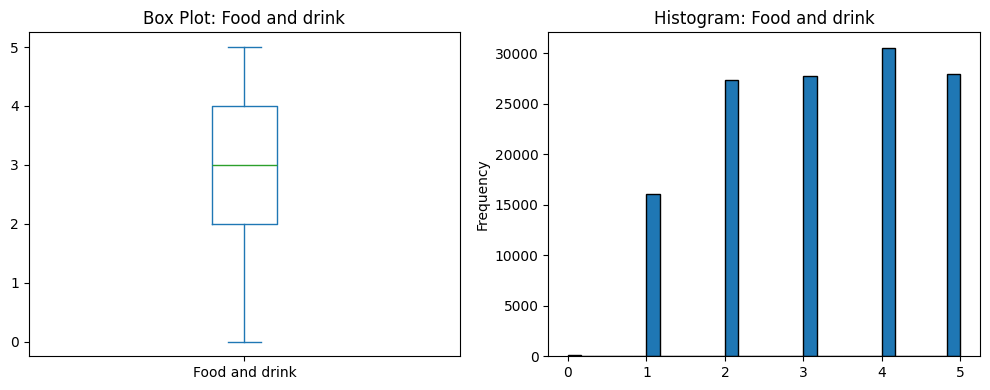

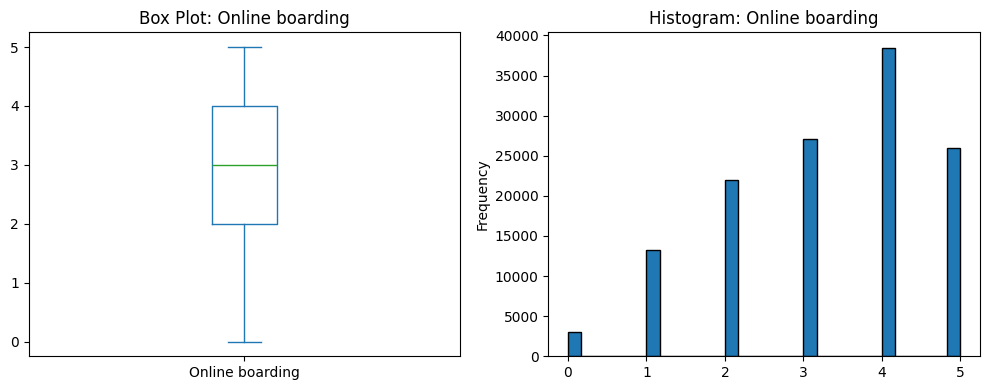

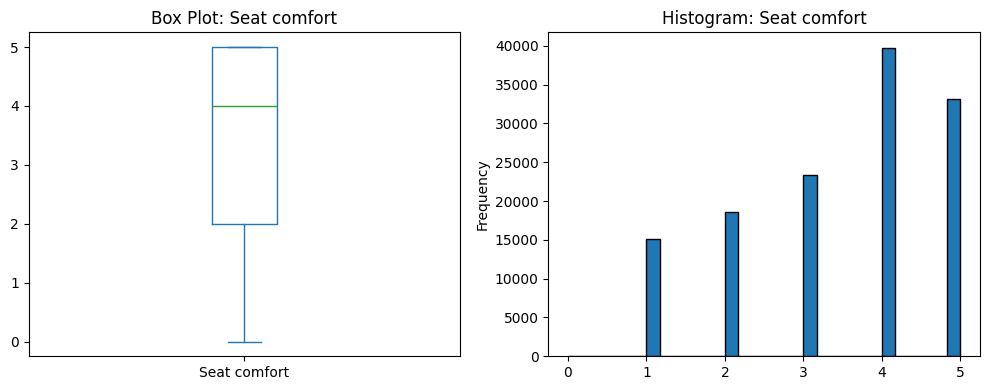

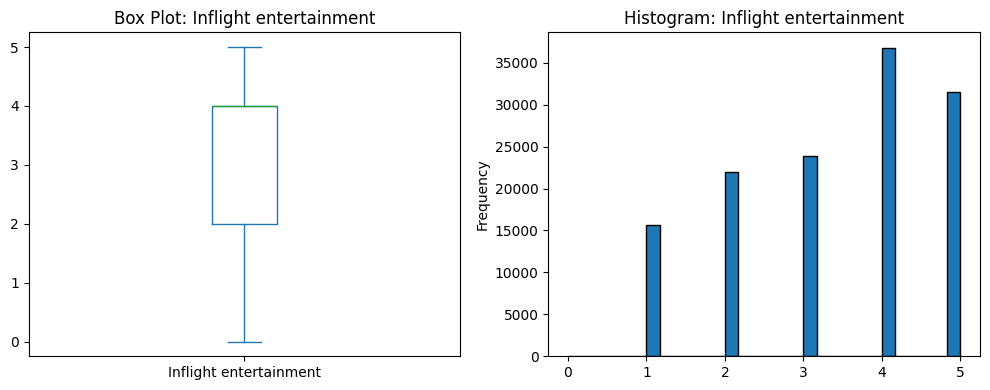

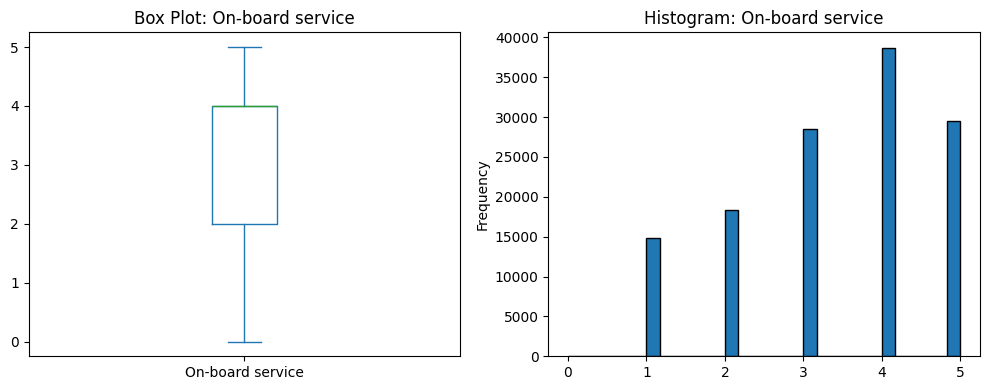

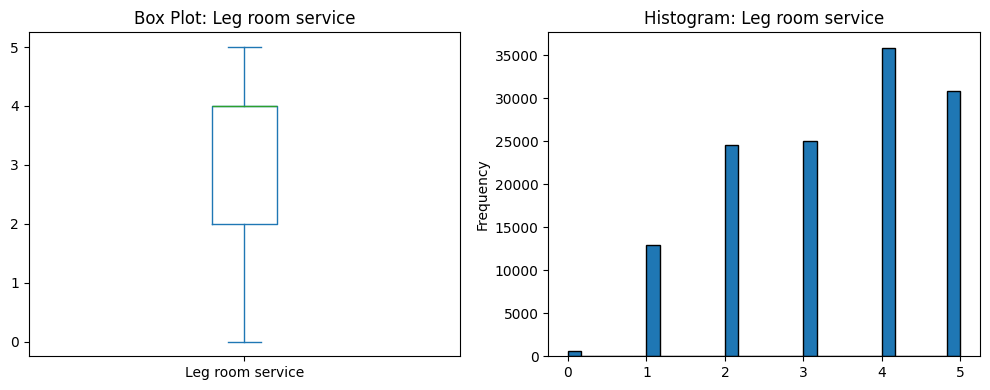

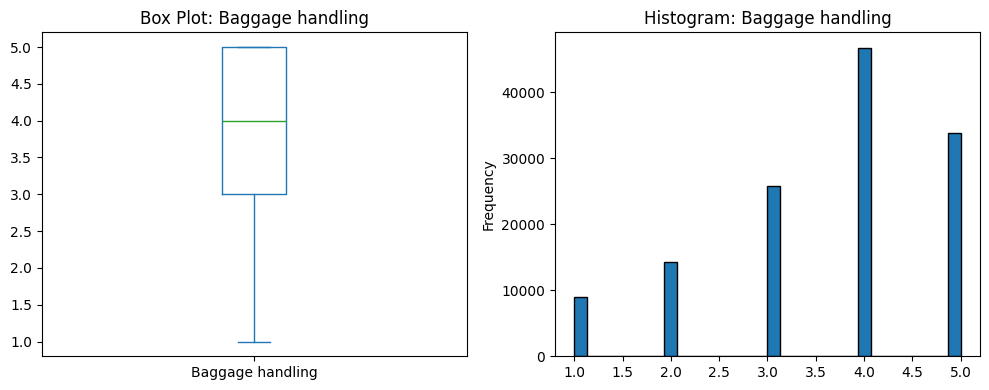

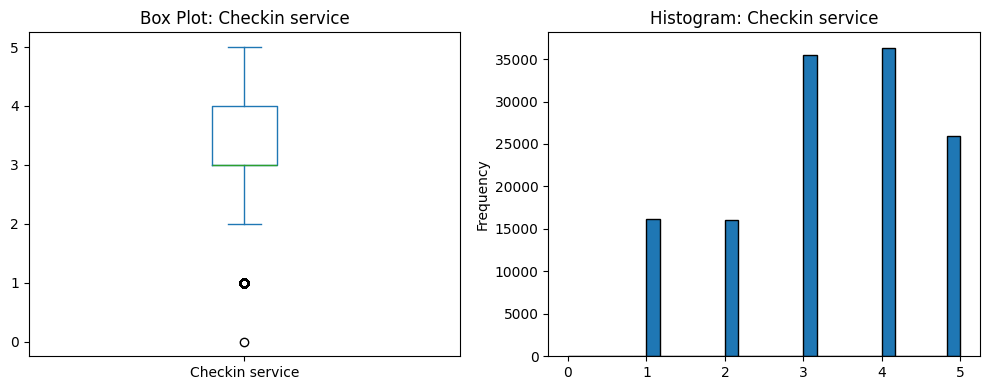

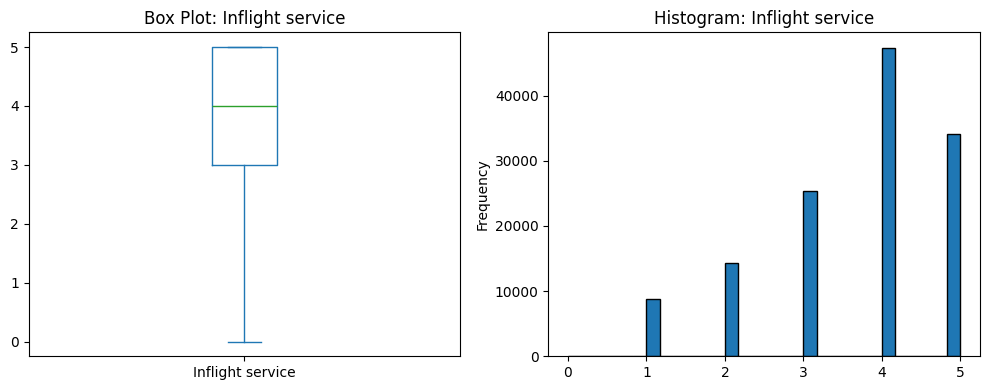

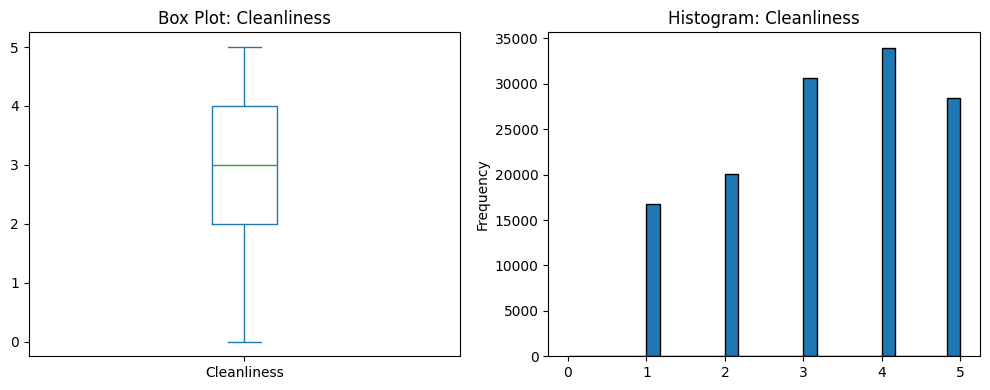

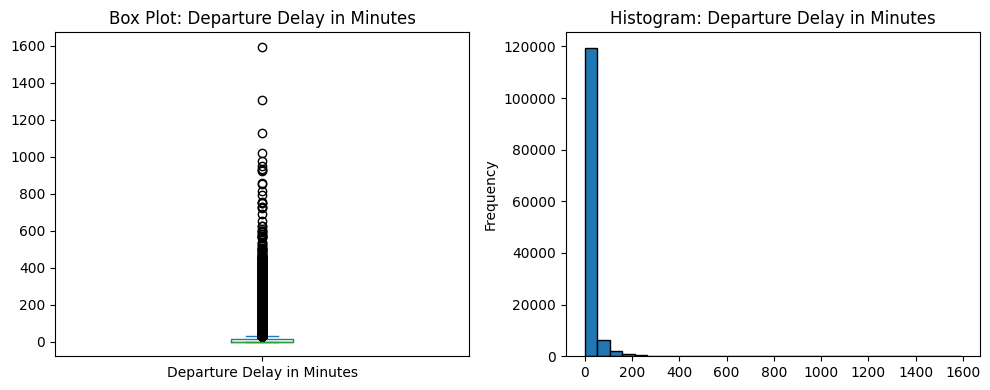

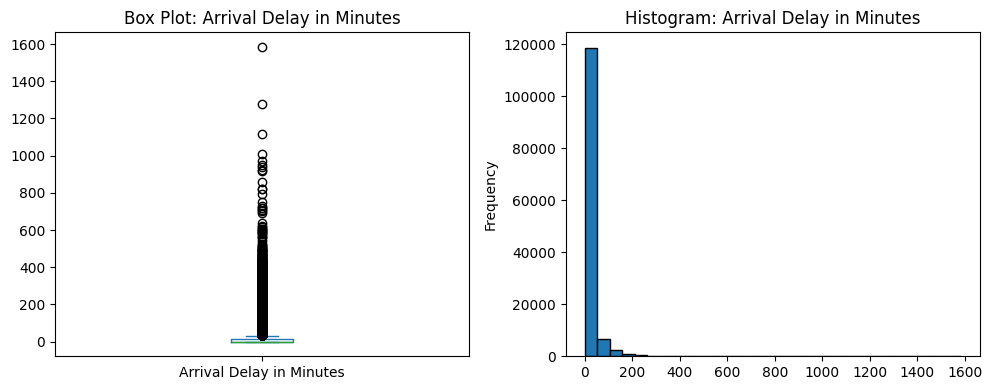

id: 0 outliers (range: -64938.50 to 194819.50)
Age: 0 outliers (range: -9.00 to 87.00)
Flight Distance: 2855 outliers (range: -1581.00 to 3739.00)
Inflight wifi service: 0 outliers (range: -1.00 to 7.00)
Departure/Arrival time convenient: 0 outliers (range: -1.00 to 7.00)
Ease of Online booking: 0 outliers (range: -1.00 to 7.00)
Gate location: 0 outliers (range: -1.00 to 7.00)
Food and drink: 0 outliers (range: -1.00 to 7.00)
Online boarding: 0 outliers (range: -1.00 to 7.00)
Seat comfort: 0 outliers (range: -2.50 to 9.50)
Inflight entertainment: 0 outliers (range: -1.00 to 7.00)
On-board service: 0 outliers (range: -1.00 to 7.00)
Leg room service: 0 outliers (range: -1.00 to 7.00)
Baggage handling: 0 outliers (range: 0.00 to 8.00)
Checkin service: 16109 outliers (range: 1.50 to 5.50)
Inflight service: 0 outliers (range: 0.00 to 8.00)
Cleanliness: 0 outliers (range: -1.00 to 7.00)
Departure Delay in Minutes: 18098 outliers (range: -18.00 to 30.00)
Arrival Delay in Minutes: 17492 outlie

In [9]:
# Box plots for numerical columns
num_cols = df.select_dtypes(include=['number']).columns

for col in num_cols:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    df[col].plot(kind='box')
    plt.title(f'Box Plot: {col}')

    plt.subplot(1, 2, 2)
    df[col].plot(kind='hist', bins=30, edgecolor='black')
    plt.title(f'Histogram: {col}')
    plt.tight_layout()
    plt.show()

# IQR method for outliers
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower) | (df[column] > upper)]
    return outliers, lower, upper

for col in num_cols:
    outliers, lower, upper = detect_outliers_iqr(df, col)
    print(f"{col}: {len(outliers)} outliers (range: {lower:.2f} to {upper:.2f})")

# **Feature Engineering**

In [10]:
# Aggregate Scores
df['digital_experience'] = df[['Inflight wifi service',
                               'Ease of Online booking',
                                'Online boarding']].mean(axis=1)
df['comfort_score'] = df[['Seat comfort',
                          'Leg room service',
                           'Inflight entertainment']].mean(axis=1)
df['service_quality'] = df[['Food and drink', 'On-board service',
                             'Inflight service', 'Cleanliness']].mean(axis=1)
# Delay-Related Scores
df['had_delay'] = (df['Departure Delay in Minutes'] > 0).astype(int)
df['delay_severity'] = pd.cut(df['Departure Delay in Minutes'],
                               bins=[-1, 0, 30, float('inf')],
                               labels=['No Delay', 'Minor', 'Major'])
# Flight Characteristics
df['flight_type'] = pd.cut(df['Flight Distance'],
                            bins=[0, 500, 1500, float('inf')],
                            labels=['Short-haul', 'Medium-haul', 'Long-haul'])
df['age_group'] = pd.cut(df['Age'],
                          bins=[0, 30, 50, float('inf')],
                          labels=['Young', 'Middle-aged', 'Senior'])

# **Preprocessing and Data Split**

In [11]:
# Encode Satisfaction level
le = LabelEncoder()
df['satisfaction'] = le.fit_transform(df['satisfaction'])
print(df['satisfaction'].value_counts())
# Split the data into train/test
X = df.drop('satisfaction', axis=1)
X = X.drop('id', axis=1)
y = df['satisfaction']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)


satisfaction
0    73452
1    56428
Name: count, dtype: int64


## **Pipeline & Column Transformer**

In [12]:
# Impute, scaler, classifier, encoder
# Identify column types
nom_col = ['Gender',
           'Customer Type',
           'Type of Travel',
           'Class',
           'delay_severity',
           'flight_type',
           'age_group'
]
ord_col = [
    'Inflight wifi service',
    'Departure/Arrival time convenient',
    'Ease of Online booking',
    'Gate location',
    'Food and drink',
    'Online boarding',
    'Seat comfort',
    'Inflight entertainment',
    'On-board service',
    'Leg room service',
    'Baggage handling',
    'Checkin service',
    'Inflight service',
    'Cleanliness'
]
num_col = [
    'Age',
    'Flight Distance',
    'Departure Delay in Minutes',
    'Arrival Delay in Minutes',
    'digital_experience',
    'comfort_score',
    'service_quality',
    'had_delay'
]

# Create variable type pipelines
nom_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first', sparse_output=False,
                             handle_unknown='ignore'))
])
ord_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Create preprocessor CT: Aggregate model and others
models = {
    'RandomForest': RandomForestClassifier(criterion='gini', n_estimators=20, random_state=1),
    'LogisticRegression': LogisticRegression(solver='lbfgs', C=1.0),
    'KNeighbors': KNeighborsClassifier(n_neighbors=5, p=2) #,
    # 'SVM': SVC(random_state = 42, kernel='rbf', C=1, probability = True)
}

preprocessor = ColumnTransformer([
    ('nom', nom_pipe, nom_col),
    ('ord', ord_pipe, ord_col),
    ('num', num_pipe, num_col)
])

pipelines = {name: make_pipeline(preprocessor, model)
 for name, model in models.items()}


# **Feature Selection**

Top 20 Most Important Features:
                              feature  importance
16                    Online boarding    0.123872
11              Inflight wifi service    0.114736
2      Type of Travel_Personal Travel    0.106169
29                 digital_experience    0.071583
30                      comfort_score    0.071305
3                           Class_Eco    0.059582
18             Inflight entertainment    0.047473
1     Customer Type_disloyal Customer    0.039226
31                    service_quality    0.036594
26                    Flight Distance    0.033780
17                       Seat comfort    0.030241
13             Ease of Online booking    0.029427
20                   Leg room service    0.027257
25                                Age    0.025059
19                   On-board service    0.020295
22                    Checkin service    0.020155
14                      Gate location    0.018041
21                   Baggage handling    0.017670
12  Departure/Arri

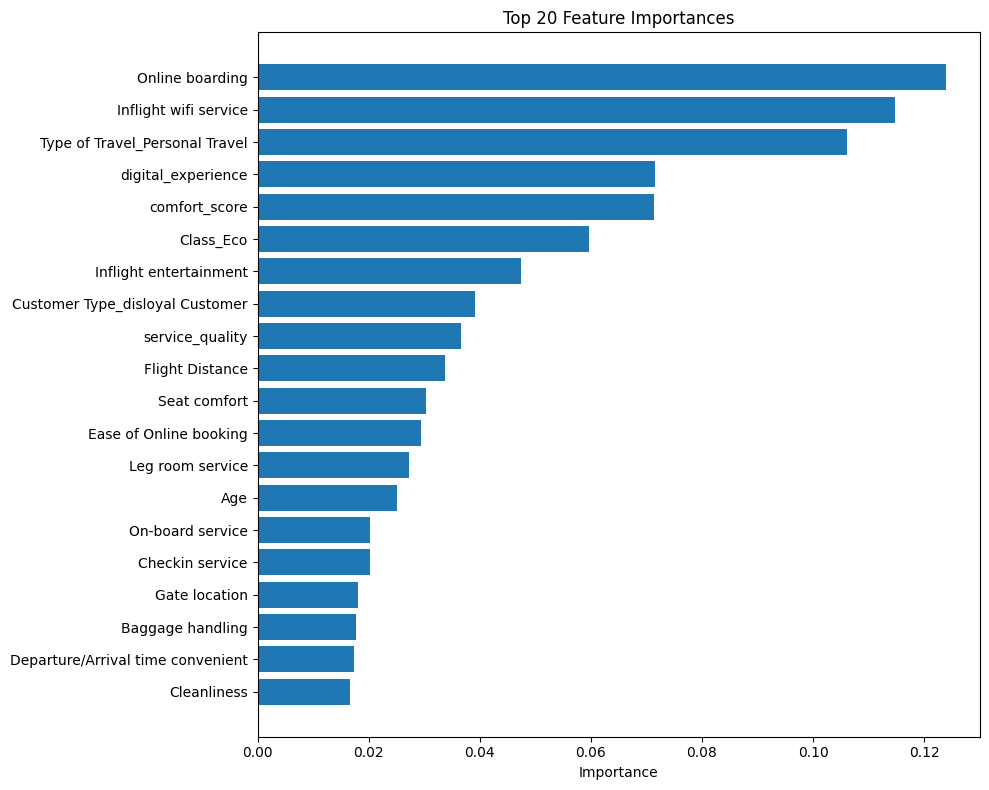


Selected 30 features:
['Customer Type_disloyal Customer', 'Type of Travel_Personal Travel', 'Class_Eco', 'Class_Eco Plus', 'delay_severity_No Delay', 'flight_type_Medium-haul', 'flight_type_Short-haul', 'age_group_Senior', 'age_group_Young', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'digital_experience', 'comfort_score', 'service_quality', 'had_delay']


In [13]:
# Feature Selection using Random Forest Feature Importance
from sklearn.ensemble import RandomForestClassifier

# First, fit the preprocessor to get feature names
preprocessor.fit(X_train)

# Transform the data
X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Get feature names after transformation
feature_names = []
# Nominal features (one-hot encoded)
if hasattr(preprocessor.named_transformers_['nom']['encoder'], 'get_feature_names_out'):
    feature_names.extend(
        preprocessor.named_transformers_['nom']['encoder'].get_feature_names_out(nom_col)
    )
# Ordinal and numerical features keep their names
feature_names.extend(ord_col)
feature_names.extend(num_col)

# Use Random Forest to get feature importance
rf_selector = RandomForestClassifier(n_estimators=100, random_state=42)
rf_selector.fit(X_train_transformed, y_train)

# Create feature importance dataframe
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': rf_selector.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 20 Most Important Features:")
print(feature_importance.head(20))

# Visualize feature importance
plt.figure(figsize=(10, 8))
plt.barh(feature_importance.head(20)['feature'],
         feature_importance.head(20)['importance'])
plt.xlabel('Importance')
plt.title('Top 20 Feature Importances')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Optional: Select top K features using SelectKBest
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=30)  # Adjust k as needed
X_train_selected = selector.fit_transform(X_train_transformed, y_train)
X_test_selected = selector.transform(X_test_transformed)

# Get selected feature names
selected_features_mask = selector.get_support()
selected_features = [feature_names[i] for i in range(len(feature_names))
                     if selected_features_mask[i]]
print(f"\nSelected {len(selected_features)} features:")
print(selected_features)

# **Model Fitting**

In [14]:
# Fit baseline models with default parameters
print("=" * 50)
print("BASELINE MODEL PERFORMANCE")
print("=" * 50)

baseline_results = {}

for name, pipeline in pipelines.items():
    print(f"\n{name}:")
    pipeline.fit(X_train, y_train)

    # Predictions
    y_pred = pipeline.predict(X_test)
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1] if hasattr(pipeline, 'predict_proba') else None

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    baseline_results[name] = {
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'f1': f1
    }

    print(f"  Accuracy:  {acc:.4f}")
    print(f"  Precision: {prec:.4f}")
    print(f"  Recall:    {rec:.4f}")
    print(f"  F1 Score:  {f1:.4f}")

    if y_pred_proba is not None:
        auc = roc_auc_score(y_test, y_pred_proba)
        baseline_results[name]['auc'] = auc
        print(f"  ROC AUC:   {auc:.4f}")

# Create comparison dataframe
baseline_df = pd.DataFrame(baseline_results).T
print("\n" + "=" * 50)
print("BASELINE COMPARISON")
print("=" * 50)
print(baseline_df)

BASELINE MODEL PERFORMANCE

RandomForest:
  Accuracy:  0.9572
  Precision: 0.9691
  Recall:    0.9315
  F1 Score:  0.9499
  ROC AUC:   0.9911

LogisticRegression:
  Accuracy:  0.8745
  Precision: 0.8702
  Recall:    0.8369
  F1 Score:  0.8532
  ROC AUC:   0.9269

KNeighbors:
  Accuracy:  0.9215
  Precision: 0.9333
  Recall:    0.8830
  F1 Score:  0.9075
  ROC AUC:   0.9655

BASELINE COMPARISON
                    accuracy  precision    recall        f1       auc
RandomForest        0.957191   0.969070  0.931528  0.949928  0.991083
LogisticRegression  0.874474   0.870164  0.836915  0.853216  0.926941
KNeighbors          0.921492   0.933292  0.883014  0.907457  0.965474


# **Hyperprameter Tuning**

In [15]:
# Opting to use RandomizedSearchCV for computational efficiency in a large dataset
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Define broader hyperparameter distributions
param_distributions = {
    'RandomForest': {
        'randomforestclassifier__n_estimators': randint(50, 300),
        'randomforestclassifier__max_depth': [10, 20, 30, 40, 50, None],
        'randomforestclassifier__min_samples_split': randint(2, 20),
        'randomforestclassifier__min_samples_leaf': randint(1, 10),
        'randomforestclassifier__max_features': ['sqrt', 'log2'],
        'randomforestclassifier__bootstrap': [True, False],
        'randomforestclassifier__criterion': ['gini', 'entropy'],
    },
    'LogisticRegression': {
        'logisticregression__C': uniform(0.001, 100),
        'logisticregression__penalty': ['l2'],
        'logisticregression__solver': ['saga', 'lbfgs'],
        'logisticregression__max_iter': [1000, 2000],
        'logisticregression__class_weight': ['balanced', None]
    },
    'KNeighbors': {
        'kneighborsclassifier__n_neighbors': randint(3, 30),
        'kneighborsclassifier__weights': ['uniform', 'distance'],
        'kneighborsclassifier__p': [1, 2],
        'kneighborsclassifier__metric': ['euclidean', 'manhattan'],
    },
    #'SVM': {
     #   'svc__C': uniform(0.1, 10),
      #  'svc__gamma': ['scale', 'auto'],
      #  'svc__kernel': ['linear', 'rbf'],
      #  'svc__probability': [True]
    #}
}

# Perform RandomizedSearchCV (much faster)
print("\n" + "=" * 50)
print("HYPERPARAMETER TUNING (Randomized Search with 3-fold CV)")
print("=" * 50)

tuned_models = {}
tuned_results = {}

for name, pipeline in pipelines.items():
    print(f"\nTuning {name}...")

    random_search = RandomizedSearchCV(
        pipeline,
        param_distributions[name],
        n_iter=15,  # Try some random combinations (adjust based on time)
        cv=6,  # Adjust as needed, expect variant computation times
        scoring='roc_auc',
        n_jobs=-1,  # Use all CPU cores
        verbose=1,
        random_state=42,
        error_score='raise'
    )

    random_search.fit(X_train, y_train)

    print(f"\nBest parameters for {name}:")
    print(random_search.best_params_)
    print(f"Best CV score: {random_search.best_score_:.4f}")

    # Store the best model
    tuned_models[name] = random_search.best_estimator_

    # Evaluate on test set
    y_pred = random_search.predict(X_test)
    y_pred_proba = random_search.predict_proba(X_test)[:, 1] if hasattr(random_search, 'predict_proba') else None

    # Calculate metrics efficiently in one pass
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)  # Handle edge cases
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    tuned_results[name] = {
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'f1': f1,
        'best_params': random_search.best_params_,
        'cv_score': random_search.best_score_
    }

    print(f"\nTest Set Performance:")
    print(f"  Accuracy:  {acc:.4f}")
    print(f"  Precision: {prec:.4f}")
    print(f"  Recall:    {rec:.4f}")
    print(f"  F1 Score:  {f1:.4f}")

    if y_pred_proba is not None:
        auc_score = roc_auc_score(y_test, y_pred_proba)
        tuned_results[name]['auc'] = auc_score
        print(f"  ROC AUC:   {auc_score:.4f}")
    else:
        print(f"  ROC AUC:   N/A (model doesn't support probability estimates)")

print("\n" + "=" * 50)
print("TUNING COMPLETE")
print("=" * 50)


HYPERPARAMETER TUNING (Randomized Search with 3-fold CV)

Tuning RandomForest...
Fitting 6 folds for each of 15 candidates, totalling 90 fits

Best parameters for RandomForest:
{'randomforestclassifier__bootstrap': False, 'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 40, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__min_samples_split': 13, 'randomforestclassifier__n_estimators': 107}
Best CV score: 0.9939

Test Set Performance:
  Accuracy:  0.9614
  Precision: 0.9740
  Recall:    0.9364
  F1 Score:  0.9549
  ROC AUC:   0.9938

Tuning LogisticRegression...
Fitting 6 folds for each of 15 candidates, totalling 90 fits

Best parameters for LogisticRegression:
{'logisticregression__C': np.float64(2.0594494295802446), 'logisticregression__class_weight': None, 'logisticregression__max_iter': 2000, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'lbfgs'}
Best CV 

# **Model Evaluation and Selection**


COMPREHENSIVE MODEL COMPARISON

Model Performance Metrics:
                    accuracy precision    recall        f1       auc  cv_score
RandomForest          0.9614  0.974034  0.936414  0.954854  0.993825   0.99391
LogisticRegression  0.874448  0.870156  0.836856  0.853181   0.92694   0.92716
KNeighbors          0.930628   0.93896  0.899323  0.918714  0.981176  0.981033


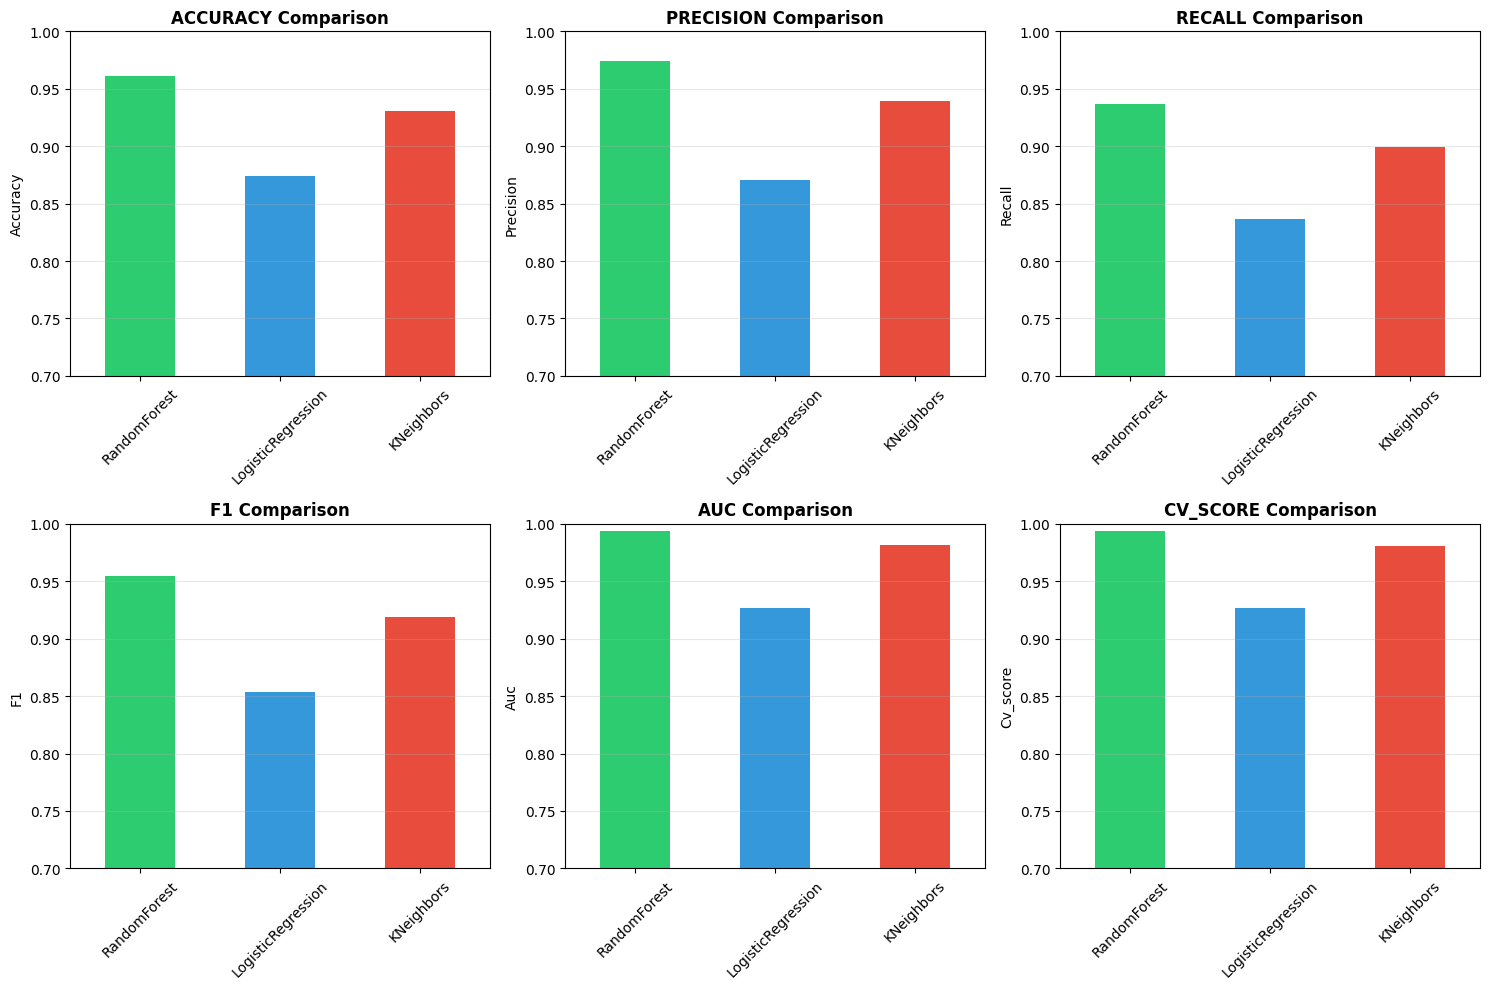


BEST MODEL SELECTED: RandomForest
Selection Criteria: Highest F1 Score

Performance Metrics:
  Accuracy: 0.9614
  Precision: 0.9740
  Recall: 0.9364
  F1: 0.9549
  Cv_score: 0.9939
  Auc: 0.9938

Best Hyperparameters:
  randomforestclassifier__bootstrap: False
  randomforestclassifier__criterion: entropy
  randomforestclassifier__max_depth: 40
  randomforestclassifier__max_features: sqrt
  randomforestclassifier__min_samples_leaf: 1
  randomforestclassifier__min_samples_split: 13
  randomforestclassifier__n_estimators: 107

DETAILED EVALUATION: RandomForest


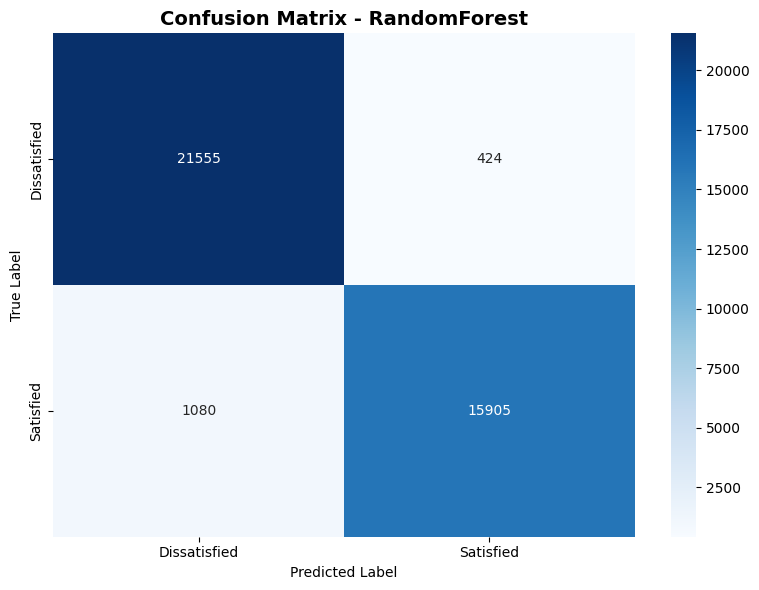


Confusion Matrix Analysis:
  True Negatives:  21,555
  False Positives: 424
  False Negatives: 1,080
  True Positives:  15,905

  Sensitivity (Recall): 0.9364
  Specificity:          0.9807

------------------------------------------------------------
Classification Report:
------------------------------------------------------------
              precision    recall  f1-score   support

Dissatisfied     0.9523    0.9807    0.9663     21979
   Satisfied     0.9740    0.9364    0.9549     16985

    accuracy                         0.9614     38964
   macro avg     0.9632    0.9586    0.9606     38964
weighted avg     0.9618    0.9614    0.9613     38964



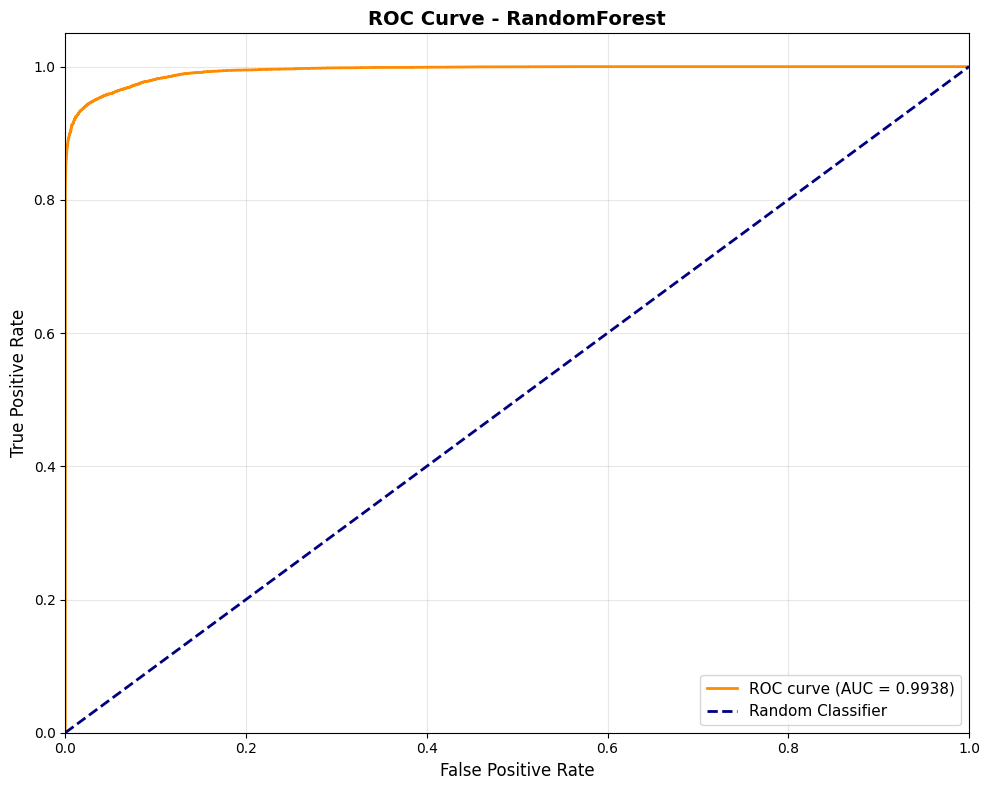

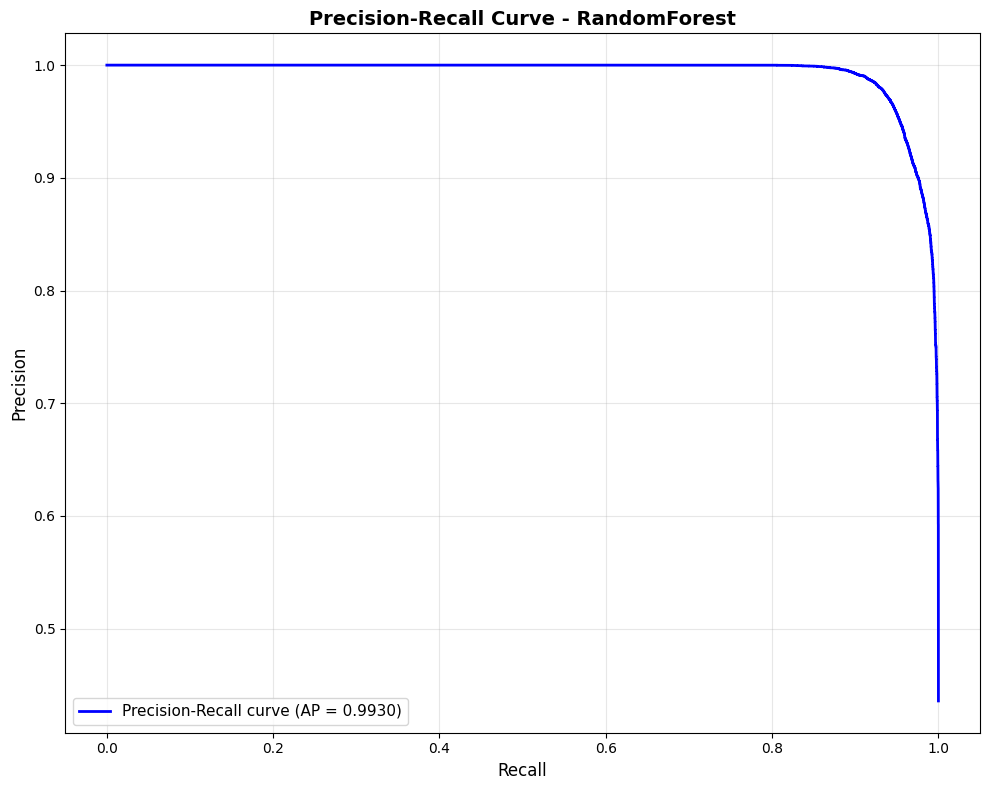

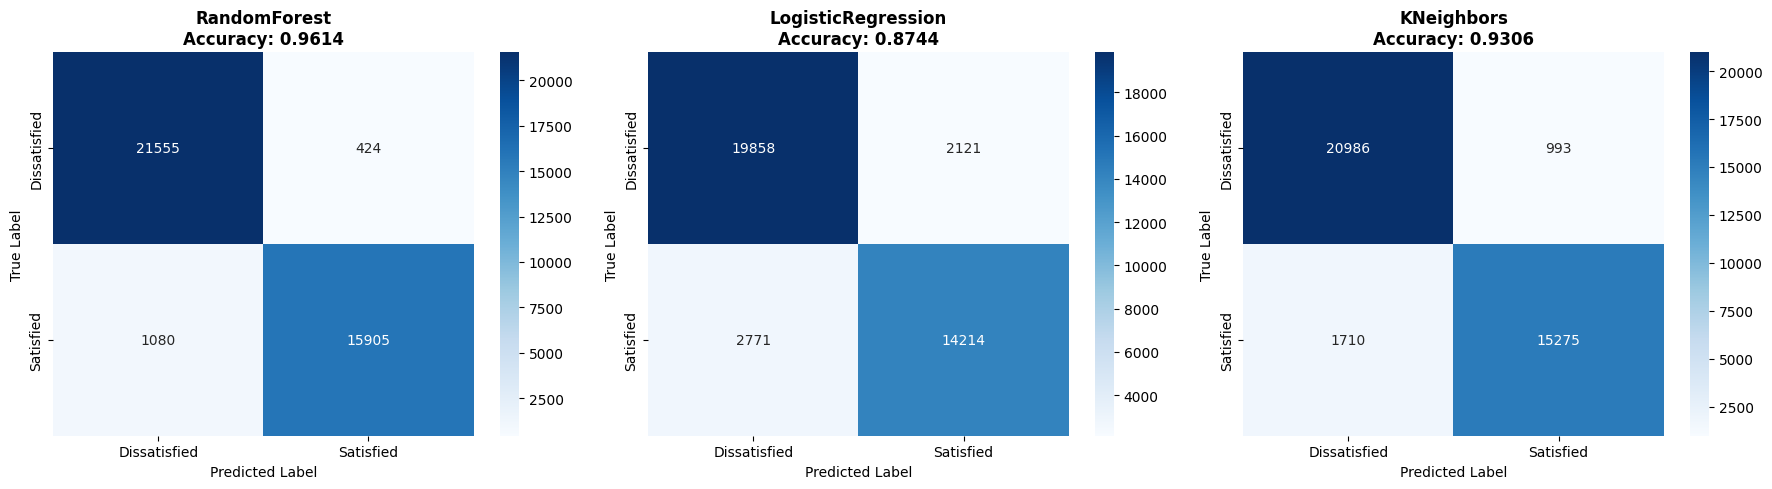

In [16]:
import sklearn # Add this line to import the sklearn module
# ============================================================
# MODEL EVALUATION AND SELECTION
# ============================================================

print("\n" + "=" * 60)
print("COMPREHENSIVE MODEL COMPARISON")
print("=" * 60)

# Create comparison dataframe
comparison_df = pd.DataFrame(tuned_results).T
comparison_df = comparison_df[['accuracy', 'precision', 'recall', 'f1', 'auc', 'cv_score']]
print("\nModel Performance Metrics:")
print(comparison_df.round(4))

# Visualize model comparison
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
metrics = ['accuracy', 'precision', 'recall', 'f1', 'auc', 'cv_score']

for idx, metric in enumerate(metrics):
    ax = axes[idx // 3, idx % 3]
    comparison_df[metric].plot(kind='bar', ax=ax, color=['#2ecc71', '#3498db', '#e74c3c'])
    ax.set_title(f'{metric.upper()} Comparison', fontsize=12, fontweight='bold')
    ax.set_ylabel(metric.capitalize())
    ax.set_xlabel('')
    ax.set_ylim([0.7, 1.0])  # Adjust based on your results
    ax.grid(axis='y', alpha=0.3)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Select best model based on F1 score (balanced metric)
best_model_name = comparison_df['f1'].idxmax()
best_model = tuned_models[best_model_name]

print("\n" + "=" * 60)
print(f"BEST MODEL SELECTED: {best_model_name}")
print("=" * 60)
print(f"Selection Criteria: Highest F1 Score")
print(f"\nPerformance Metrics:")
for metric, value in tuned_results[best_model_name].items():
    if metric not in ['best_params']:
        print(f"  {metric.capitalize()}: {value:.4f}")

print(f"\nBest Hyperparameters:")
for param, value in tuned_results[best_model_name]['best_params'].items():
    print(f"  {param}: {value}")

# Detailed evaluation of best model
print("\n" + "=" * 60)
print(f"DETAILED EVALUATION: {best_model_name}")
print("=" * 60)

y_pred_best = best_model.predict(X_test)
y_pred_proba_best = best_model.predict_proba(X_test)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Dissatisfied', 'Satisfied'],
            yticklabels=['Dissatisfied', 'Satisfied'])
plt.title(f'Confusion Matrix - {best_model_name}', fontsize=14, fontweight='bold')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# Calculate additional metrics from confusion matrix
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)

print(f"\nConfusion Matrix Analysis:")
print(f"  True Negatives:  {tn:,}")
print(f"  False Positives: {fp:,}")
print(f"  False Negatives: {fn:,}")
print(f"  True Positives:  {tp:,}")
print(f"\n  Sensitivity (Recall): {sensitivity:.4f}")
print(f"  Specificity:          {specificity:.4f}")

# Classification Report
print("\n" + "-" * 60)
print("Classification Report:")
print("-" * 60)
print(classification_report(y_test, y_pred_best,
                          target_names=['Dissatisfied', 'Satisfied'],
                          digits=4))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_best)
roc_auc = sklearn.metrics.auc(fpr, tpr) # Fix: Explicitly use sklearn.metrics.auc

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title(f'ROC Curve - {best_model_name}', fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Precision-Recall Curve
from sklearn.metrics import precision_recall_curve, average_precision_score

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_pred_proba_best)
avg_precision = average_precision_score(y_test, y_pred_proba_best)

plt.figure(figsize=(10, 8))
plt.plot(recall_vals, precision_vals, color='blue', lw=2,
         label=f'Precision-Recall curve (AP = {avg_precision:.4f})')
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title(f'Precision-Recall Curve - {best_model_name}', fontsize=14, fontweight='bold')
plt.legend(loc="lower left", fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Model comparison across all models - All confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, (name, model) in enumerate(tuned_models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                xticklabels=['Dissatisfied', 'Satisfied'],
                yticklabels=['Dissatisfied', 'Satisfied'])
    axes[idx].set_title(f'{name}\nAccuracy: {tuned_results[name]["accuracy"]:.4f}',
                       fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('True Label')
    axes[idx].set_xlabel('Predicted Label')

plt.tight_layout()
plt.show()

# **SHAP Analysis**


SHAP ANALYSIS - Feature Importance & Interpretability

Total features after preprocessing: 33
Best model: RandomForest

Calculating SHAP values for 500 samples...
Using TreeExplainer for Random Forest...


 99%|===================| 993/1000 [02:49<00:01]       

✓ SHAP values calculated successfully!

[1/6] Generating SHAP Summary Plot...


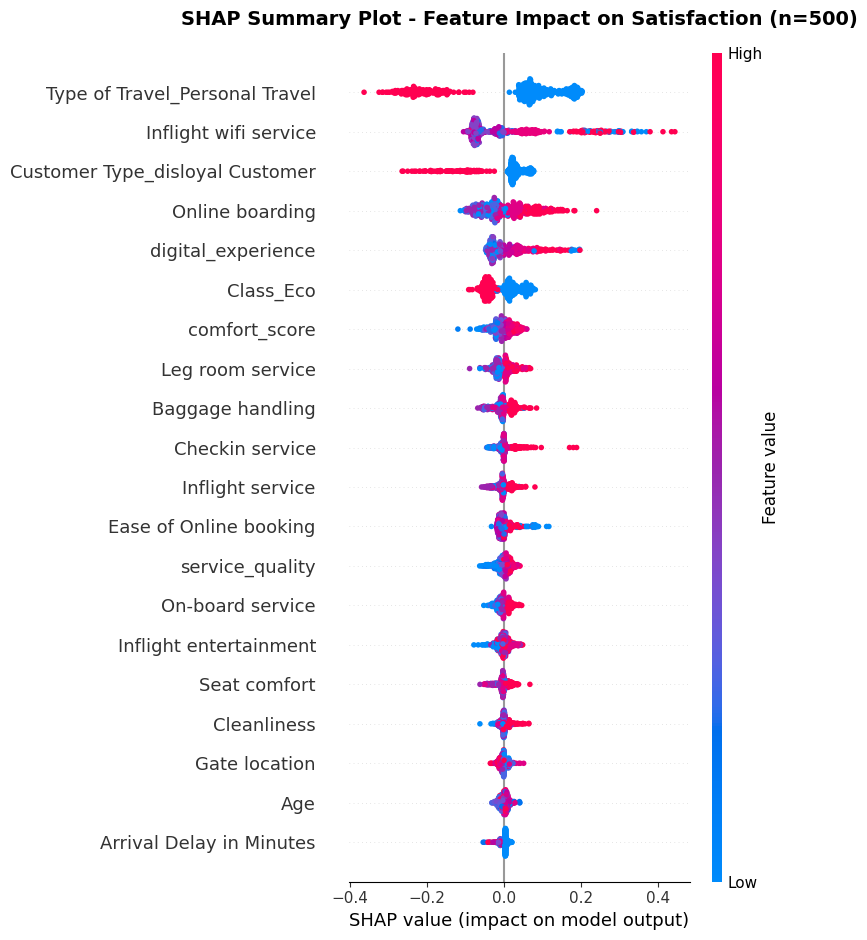

[2/6] Generating SHAP Feature Importance Bar Plot...


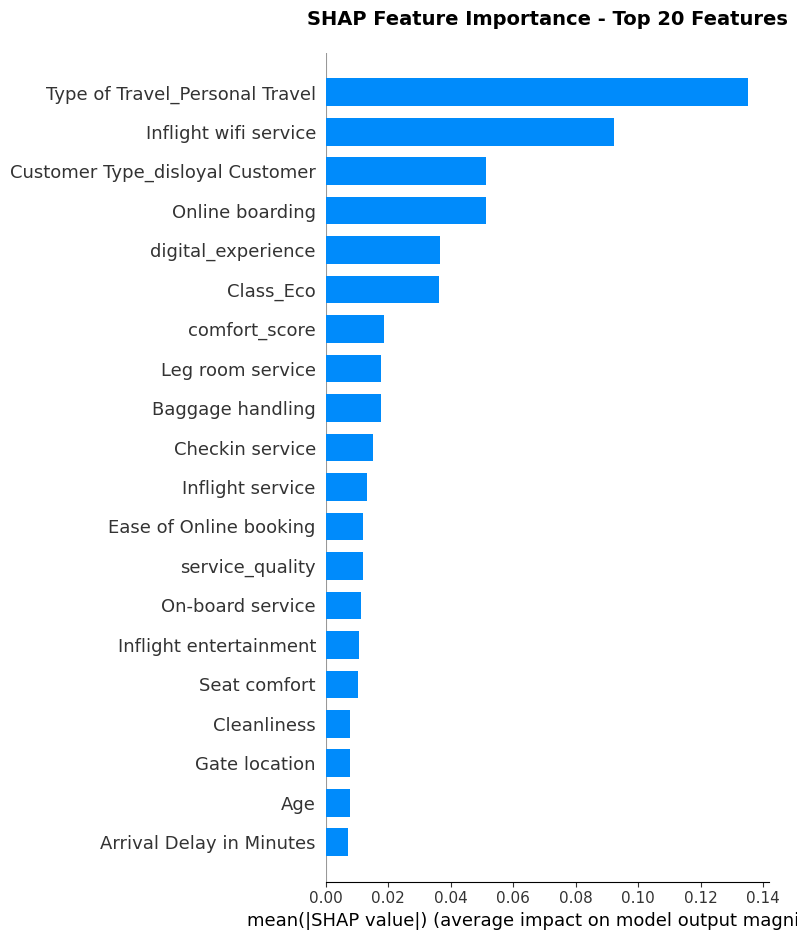

[3/6] Calculating feature importance rankings...

------------------------------------------------------------
Top 20 Most Important Features (by mean |SHAP value|):
------------------------------------------------------------
                        feature  mean_abs_shap
 Type of Travel_Personal Travel       0.135053
          Inflight wifi service       0.092176
Customer Type_disloyal Customer       0.051448
                Online boarding       0.051402
             digital_experience       0.036491
                      Class_Eco       0.036286
                  comfort_score       0.018841
               Leg room service       0.017699
               Baggage handling       0.017666
                Checkin service       0.015301
               Inflight service       0.013264
         Ease of Online booking       0.012116
                service_quality       0.011873
               On-board service       0.011193
         Inflight entertainment       0.010588
                   Se

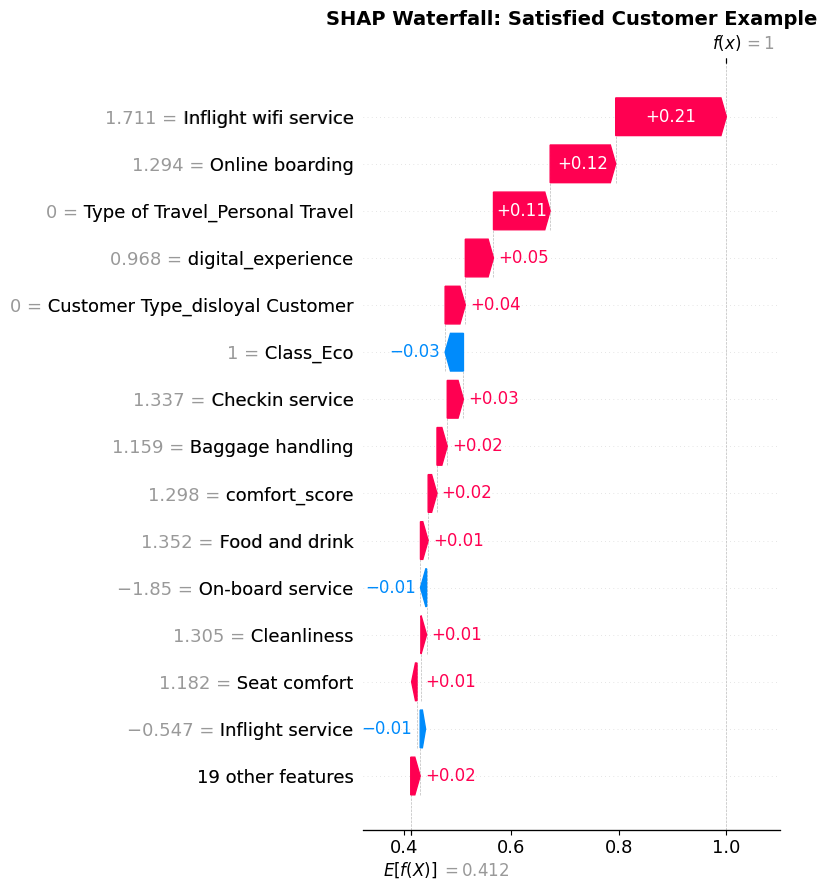

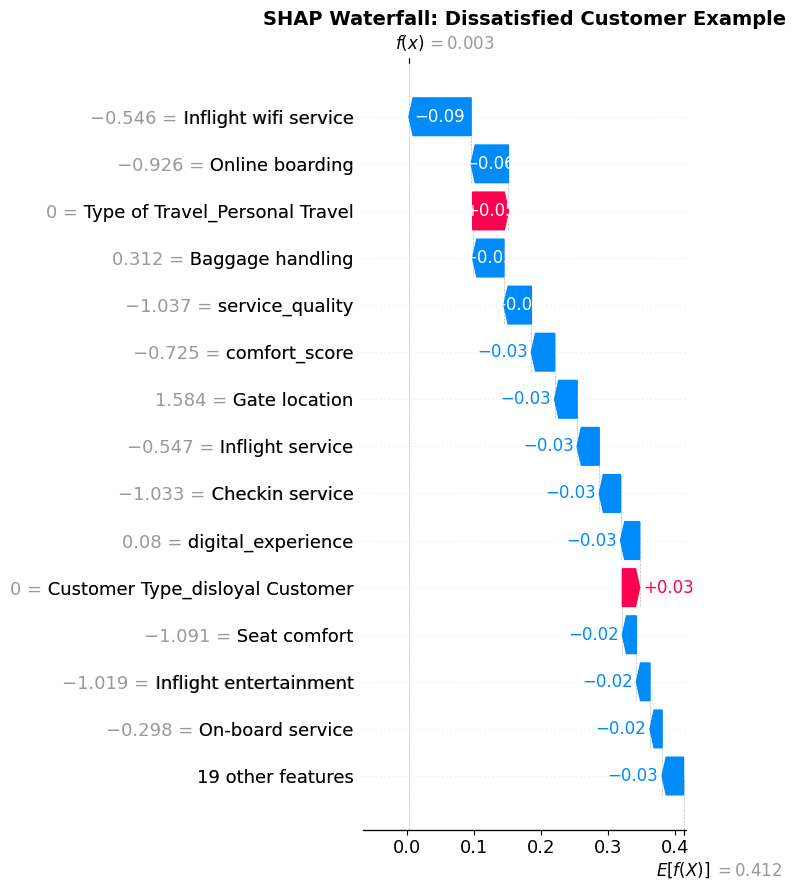


[5/6] Generating SHAP Dependence Plots for Top 4 Features...


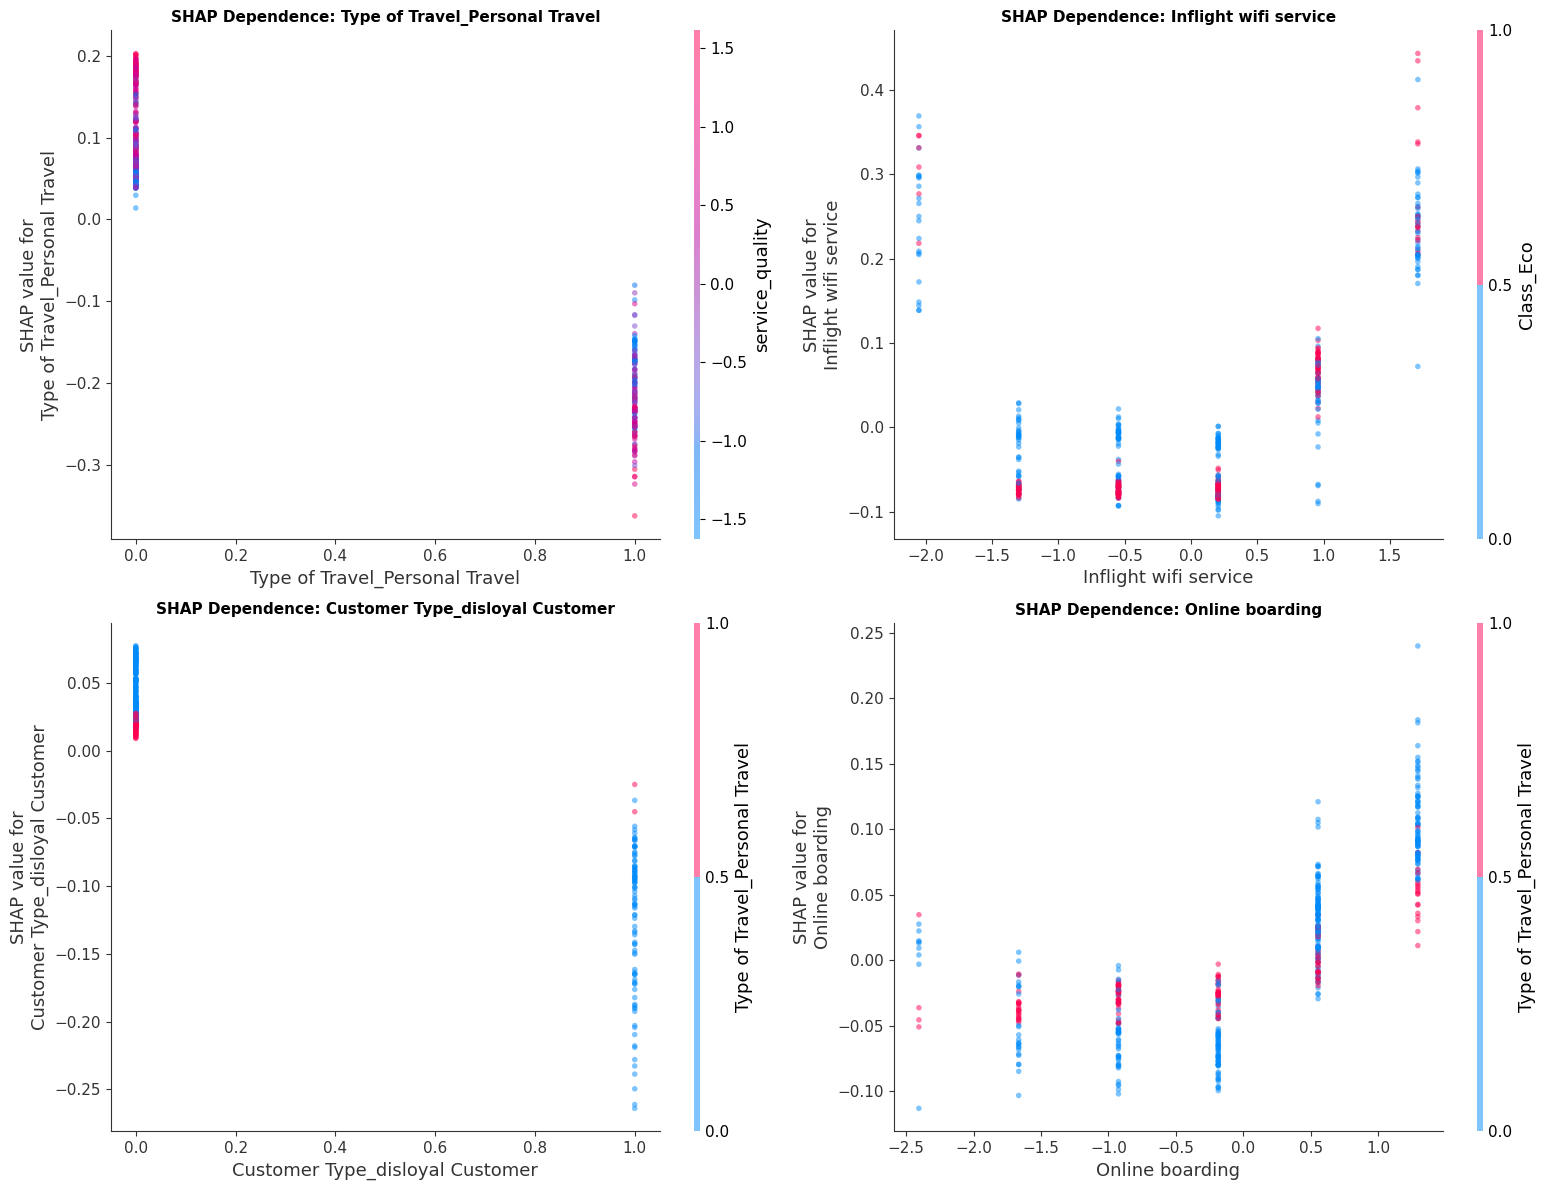


[6/6] Generating SHAP Force Plot for first prediction...



✓ SHAP feature importance saved to 'shap_feature_importance.csv'

SHAP ANALYSIS COMPLETE


In [17]:
# ============================================================
# SHAP ANALYSIS FOR MODEL INTERPRETABILITY (OPTIMIZED)
# ============================================================

import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.sparse import issparse

print("\n" + "=" * 60)
print("SHAP ANALYSIS - Feature Importance & Interpretability")
print("=" * 60)

# Get the preprocessor and classifier from the best pipeline
preprocessor_step = best_model.named_steps['columntransformer']
classifier_step = best_model.named_steps[list(best_model.named_steps.keys())[-1]]

# Transform data for SHAP
X_train_transformed = preprocessor_step.transform(X_train)
X_test_transformed = preprocessor_step.transform(X_test)

# Convert sparse matrices to dense (SHAP works better with dense arrays)
if issparse(X_train_transformed):
    X_train_transformed = X_train_transformed.toarray()
if issparse(X_test_transformed):
    X_test_transformed = X_test_transformed.toarray()

# Get feature names after transformation
feature_names = []

# Nominal features (one-hot encoded)
if 'nom' in preprocessor_step.named_transformers_:
    if hasattr(preprocessor_step.named_transformers_['nom'], 'get_feature_names_out'):
        nom_features = preprocessor_step.named_transformers_['nom'].get_feature_names_out(nom_col)
        feature_names.extend(nom_features)
    elif hasattr(preprocessor_step.named_transformers_['nom']['encoder'], 'get_feature_names_out'):
        nom_features = preprocessor_step.named_transformers_['nom']['encoder'].get_feature_names_out(nom_col)
        feature_names.extend(nom_features)

# Ordinal and numerical features keep their names
feature_names.extend(ord_col)
feature_names.extend(num_col)

print(f"\nTotal features after preprocessing: {len(feature_names)}")
print(f"Best model: {best_model_name}")

# OPTIMIZATION: Reduce sample size for SHAP calculations
MAX_SHAP_SAMPLES = 500  # Reduced from full test set
shap_sample_indices = np.random.choice(len(X_test_transformed),
                                       min(MAX_SHAP_SAMPLES, len(X_test_transformed)),
                                       replace=False)
X_shap = X_test_transformed[shap_sample_indices]
y_shap = y_test.iloc[shap_sample_indices] if hasattr(y_test, 'iloc') else y_test[shap_sample_indices]

# Create SHAP explainer based on model type
print(f"\nCalculating SHAP values for {len(X_shap)} samples...")

# Define a background dataset for TreeExplainer
# A small sample of the training data is typically used for performance when feature_perturbation='interventional'
background_data = shap.sample(X_train_transformed, 100) # Sample 100 instances from X_train_transformed

if best_model_name == 'RandomForest':
    print("Using TreeExplainer for Random Forest...")
    explainer = shap.TreeExplainer(
        classifier_step,
        data=background_data, # Add the background data here to satisfy 'interventional' perturbation requirement
        feature_perturbation='interventional',  # Faster than default
        model_output='probability'
    )
    shap_values = explainer.shap_values(X_shap, check_additivity=False)  # Skip additivity check

    # For binary classification, if shap_values is a list of arrays, take values for positive class
    # If it's already a 3D array (samples, features, classes), then we'll select the positive class later
    if isinstance(shap_values, list) and len(shap_values) == 2:
        shap_values_to_plot = shap_values[1]
    else:
        # Assume it's already (samples, features, classes) and take the positive class (index 1)
        shap_values_to_plot = shap_values[:, :, 1]

    base_value = explainer.expected_value
    if isinstance(base_value, (list, np.ndarray)) and len(base_value) == 2:
        base_value = base_value[1]

elif best_model_name == 'LogisticRegression':
    print("Using LinearExplainer for Logistic Regression...")
    # OPTIMIZATION: Sample background data
    background_sample = shap.sample(X_train_transformed, min(100, len(X_train_transformed)))
    explainer = shap.LinearExplainer(classifier_step, background_sample)
    shap_values = explainer.shap_values(X_shap)

    shap_values_to_plot = shap_values[:, 1] if shap_values.ndim == 2 else shap_values[:, :, 1] # Ensure 2D (samples, features)
    base_value = explainer.expected_value
    if isinstance(base_value, (list, np.ndarray)):
        base_value = base_value[1] if len(base_value) > 1 else base_value[0]

else:  # KNeighbors
    print("Using KernelExplainer for KNN (sampling for speed)...")
    # OPTIMIZATION: Aggressive sampling for KNN
    background = shap.sample(X_train_transformed, 50)  # Reduced from 100
    X_shap = X_shap[:200]  # Only analyze 200 samples
    y_shap = y_shap[:200]

    def predict_proba_wrapper(X):
        return classifier_step.predict_proba(X)

    explainer = shap.KernelExplainer(predict_proba_wrapper, background)
    shap_values = explainer.shap_values(X_shap, nsamples=100)  # Reduced nsamples

    if isinstance(shap_values, list) and len(shap_values) == 2:
        shap_values_to_plot = shap_values[1]
    else:
        # Assume it's already (samples, features, classes) and take the positive class (index 1)
        shap_values_to_plot = shap_values[:, :, 1]

    base_value = explainer.expected_value
    if isinstance(base_value, (list, np.ndarray)) and len(base_value) == 2:
        base_value = base_value[1]

print("✓ SHAP values calculated successfully!")

# 1. Summary Plot (Bee swarm) - Shows feature importance and impact direction
print("\n[1/6] Generating SHAP Summary Plot...")
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values_to_plot, X_shap, feature_names=feature_names,
                 show=False, max_display=20)
plt.title(f'SHAP Summary Plot - Feature Impact on Satisfaction (n={len(X_shap)})',
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# 2. Bar Plot - Mean absolute SHAP values (feature importance)
print("[2/6] Generating SHAP Feature Importance Bar Plot...")
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values_to_plot, X_shap, feature_names=feature_names,
                 plot_type="bar", show=False, max_display=20)
plt.title('SHAP Feature Importance - Top 20 Features',
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# 3. Calculate and display mean absolute SHAP values
print("[3/6] Calculating feature importance rankings...")
shap_importance = pd.DataFrame({
    'feature': feature_names,
    'mean_abs_shap': np.abs(shap_values_to_plot).mean(axis=0)
}).sort_values('mean_abs_shap', ascending=False)

print("\n" + "-" * 60)
print("Top 20 Most Important Features (by mean |SHAP value|):")
print("-" * 60)
print(shap_importance.head(20).to_string(index=False))

# 4. Waterfall plot for individual predictions
print("\n[4/6] Generating SHAP Waterfall Plots for Sample Predictions...")

satisfied_indices = np.where(y_shap == 1)[0]
dissatisfied_indices = np.where(y_shap == 0)[0]

if len(satisfied_indices) > 0 and len(dissatisfied_indices) > 0:
    satisfied_idx = satisfied_indices[0]
    dissatisfied_idx = dissatisfied_indices[0]

    # Plot satisfied customer separately
    plt.figure(figsize=(12, 8))
    shap.waterfall_plot(shap.Explanation(
        values=shap_values_to_plot[satisfied_idx],
        base_values=base_value,
        data=X_shap[satisfied_idx],
        feature_names=feature_names
    ), max_display=15, show=False)
    plt.title('SHAP Waterfall: Satisfied Customer Example',
              fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

    # Plot dissatisfied customer separately
    plt.figure(figsize=(12, 8))
    shap.waterfall_plot(shap.Explanation(
        values=shap_values_to_plot[dissatisfied_idx],
        base_values=base_value,
        data=X_shap[dissatisfied_idx],
        feature_names=feature_names
    ), max_display=15, show=False)
    plt.title('SHAP Waterfall: Dissatisfied Customer Example',
              fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
else:
    print("⚠ Warning: Not enough samples of both classes for waterfall plots")

# 5. Dependence plots for top features
print("\n[5/6] Generating SHAP Dependence Plots for Top 4 Features...")
top_features = shap_importance.head(4)['feature'].values

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

for idx, feature in enumerate(top_features):
    if feature in feature_names:
        feature_idx = feature_names.index(feature)
        shap.dependence_plot(
            feature_idx,
            shap_values_to_plot,
            X_shap,
            feature_names=feature_names,
            ax=axes[idx],
            show=False,
            alpha=0.5  # Make points more transparent for clearer visualization
        )
        axes[idx].set_title(f'SHAP Dependence: {feature}', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

# 6. Force plot for a single prediction
print("\n[6/6] Generating SHAP Force Plot for first prediction...")
try:
    shap.initjs()
    force_plot = shap.force_plot(
        base_value,
        shap_values_to_plot[0],
        X_shap[0],
        feature_names=feature_names,
        matplotlib=False  # Use interactive HTML plot
    )
    display(force_plot)  # For Jupyter notebooks
except Exception as e:
    print(f"⚠ Interactive force plot not available: {e}")
    print("Generating static matplotlib force plot instead...")
    plt.figure(figsize=(20, 3))
    shap.force_plot(
        base_value,
        shap_values_to_plot[0],
        X_shap[0],
        feature_names=feature_names,
        matplotlib=True,
        show=False
    )
    plt.tight_layout()
    plt.show()

# Save SHAP importance for later use
shap_importance.to_csv('shap_feature_importance.csv', index=False)
print("\n✓ SHAP feature importance saved to 'shap_feature_importance.csv'")

print("\n" + "=" * 60)
print("SHAP ANALYSIS COMPLETE")
print("=" * 60)


# **Insights**


ACTIONABLE BUSINESS INSIGHTS & RECOMMENDATIONS

1. KEY DRIVERS OF CUSTOMER SATISFACTION
------------------------------------------------------------

Top 10 Most Influential Factors:
  3. Type of Travel_Personal Travel: 0.1351
  12. Inflight wifi service: 0.0922
  2. Customer Type_disloyal Customer: 0.0514
  17. Online boarding: 0.0514
  30. digital_experience: 0.0365
  4. Class_Eco: 0.0363
  31. comfort_score: 0.0188
  21. Leg room service: 0.0177
  22. Baggage handling: 0.0177
  23. Checkin service: 0.0153

2. FEATURE CATEGORY ANALYSIS
------------------------------------------------------------

Digital Experience Features (3):
  • Inflight wifi service
  • Online boarding
  • digital_experience

Comfort Features (2):
  • comfort_score
  • Leg room service

Service Quality Features (4):
  • Inflight wifi service
  • Leg room service
  • Baggage handling
  • Checkin service

Operational Features (1):
  • Checkin service

3. SATISFACTION PATTERNS BY CUSTOMER SEGMENT
-----------------

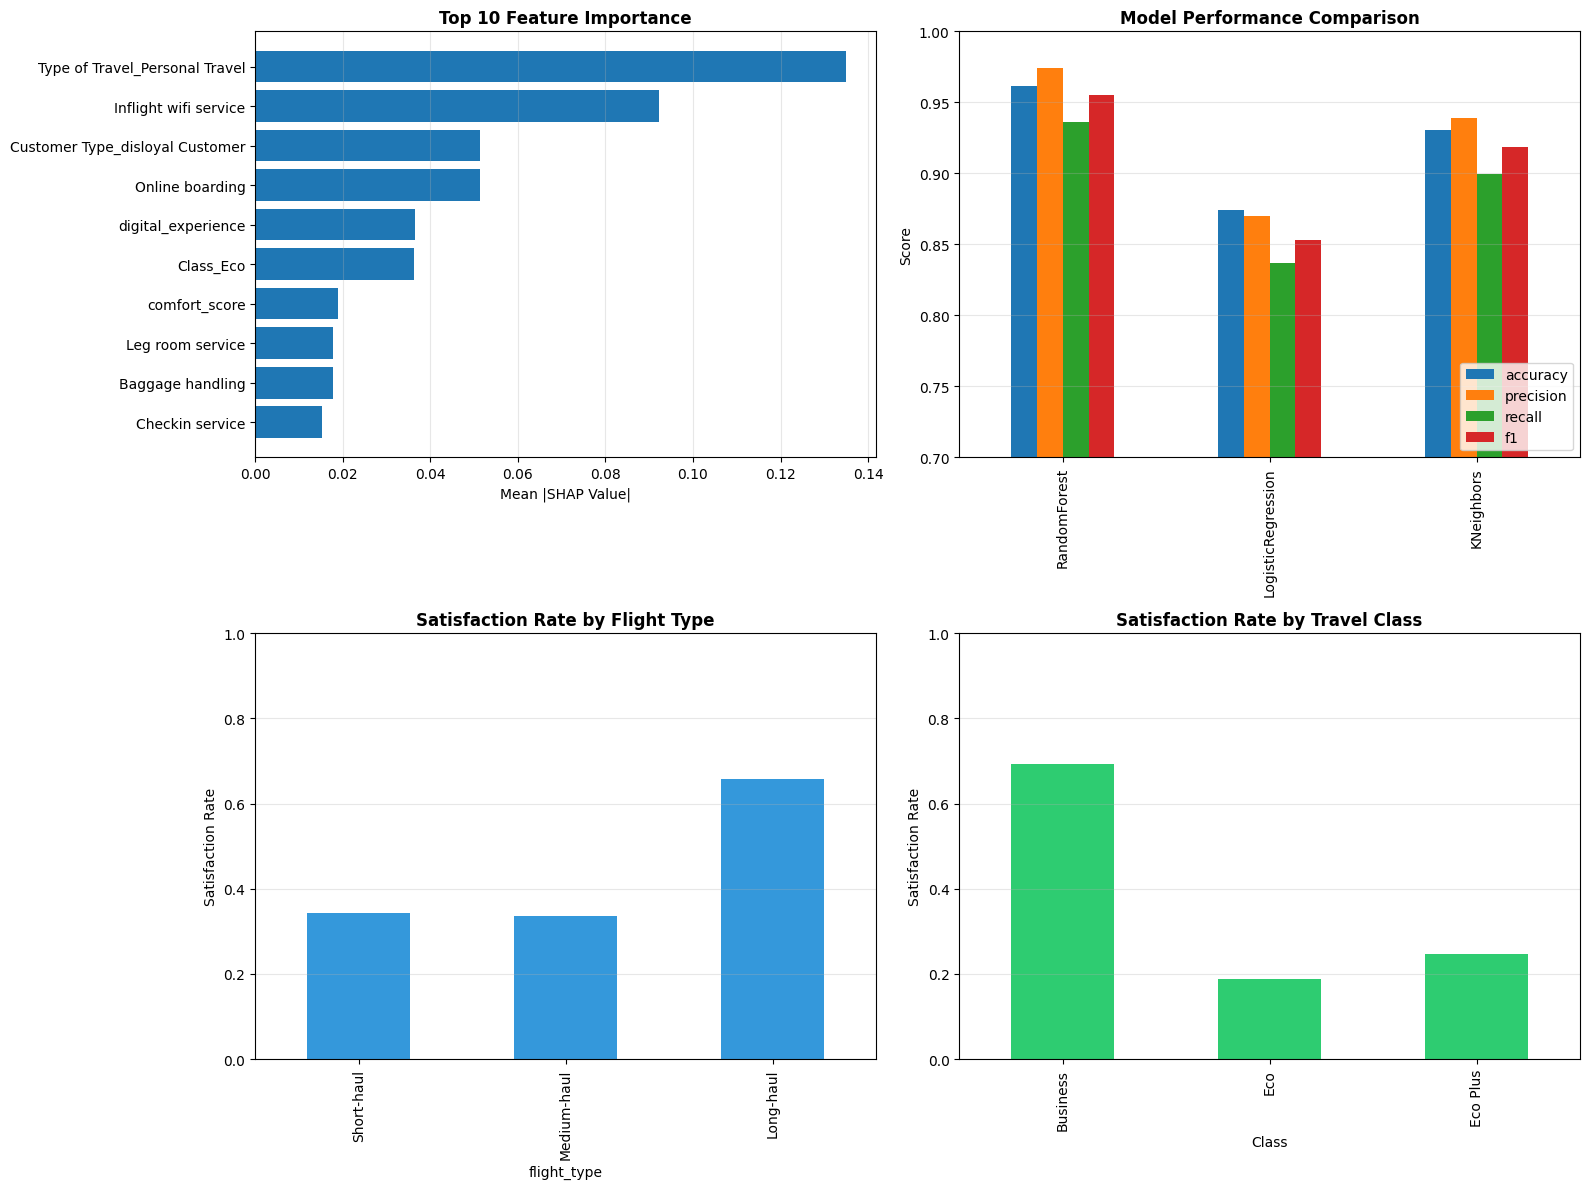


ANALYSIS COMPLETE


In [22]:
# ============================================================
# ACTIONABLE BUSINESS INSIGHTS
# ============================================================

print("\n" + "=" * 60)
print("ACTIONABLE BUSINESS INSIGHTS & RECOMMENDATIONS")
print("=" * 60)

# Analyze top drivers from SHAP
top_10_features = shap_importance.head(10)

print("\n1. KEY DRIVERS OF CUSTOMER SATISFACTION")
print("-" * 60)
print("\nTop 10 Most Influential Factors:")
for idx, row in top_10_features.iterrows():
    print(f"  {idx+1}. {row['feature']}: {row['mean_abs_shap']:.4f}")

# Categorize features
digital_features = [f for f in top_10_features['feature'] if any(x in f.lower() for x in ['wifi', 'online', 'booking', 'digital'])]
comfort_features = [f for f in top_10_features['feature'] if any(x in f.lower() for x in ['seat', 'leg', 'comfort', 'entertainment'])]
service_features = [f for f in top_10_features['feature'] if any(x in f.lower() for x in ['food', 'service', 'clean', 'baggage'])]
operational_features = [f for f in top_10_features['feature'] if any(x in f.lower() for x in ['delay', 'time', 'gate', 'checkin'])]

print("\n2. FEATURE CATEGORY ANALYSIS")
print("-" * 60)
print(f"\nDigital Experience Features ({len(digital_features)}):")
for f in digital_features:
    print(f"  • {f}")

print(f"\nComfort Features ({len(comfort_features)}):")
for f in comfort_features:
    print(f"  • {f}")

print(f"\nService Quality Features ({len(service_features)}):")
for f in service_features:
    print(f"  • {f}")

print(f"\nOperational Features ({len(operational_features)}):")
for f in operational_features:
    print(f"  • {f}")

# Analyze satisfaction by flight type
print("\n3. SATISFACTION PATTERNS BY CUSTOMER SEGMENT")
print("-" * 60)

# Merge predictions back with original features for analysis
X_test_with_pred = X_test.copy() # Use the original X_test DataFrame
X_test_with_pred['predicted_satisfaction'] = y_pred_best
X_test_with_pred['actual_satisfaction'] = y_test

# Analysis by flight type
if 'flight_type' in X_test_with_pred.columns:
    print("\nSatisfaction Rate by Flight Type:")
    flight_analysis = X_test_with_pred.groupby('flight_type', observed=False)['actual_satisfaction'].agg([
        ('total_customers', 'count'),
        ('satisfied_customers', 'sum'),
        ('satisfaction_rate', 'mean')
    ])
    print(flight_analysis)

# Analysis by customer type
if 'Customer Type' in X_test_with_pred.columns:
    print("\nSatisfaction Rate by Customer Type:")
    customer_analysis = X_test_with_pred.groupby('Customer Type')['actual_satisfaction'].agg([
        ('total_customers', 'count'),
        ('satisfied_customers', 'sum'),
        ('satisfaction_rate', 'mean')
    ])
    print(customer_analysis)

# Analysis by class
if 'Class' in X_test_with_pred.columns:
    print("\nSatisfaction Rate by Travel Class:")
    class_analysis = X_test_with_pred.groupby('Class', observed=False)['actual_satisfaction'].agg([
        ('total_customers', 'count'),
        ('satisfied_customers', 'sum'),
        ('satisfaction_rate', 'mean')
    ])
    print(class_analysis)

# Calculate feature correlation with satisfaction in engineered features
print("\n4. ENGINEERED FEATURE PERFORMANCE")
print("-" * 60)
engineered_features = ['digital_experience', 'comfort_score', 'service_quality']
for feature in engineered_features:
    if feature in X_test.columns:
        corr = X_test[feature].corr(y_test)
        print(f"{feature}: Correlation with satisfaction = {corr:.4f}")

print("\n5. INSIGHT VISUALIZATIONS")
print("-" * 60)

# Create insight visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Top 10 features importance
axes[0, 0].barh(top_10_features['feature'][::-1], top_10_features['mean_abs_shap'][::-1])
axes[0, 0].set_xlabel('Mean |SHAP Value|')
axes[0, 0].set_title('Top 10 Feature Importance', fontweight='bold')
axes[0, 0].grid(axis='x', alpha=0.3)

# 2. Model performance comparison
comparison_df[['accuracy', 'precision', 'recall', 'f1']].plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title('Model Performance Comparison', fontweight='bold')
axes[0, 1].set_ylabel('Score')
axes[0, 1].legend(loc='lower right')
axes[0, 1].set_ylim([0.7, 1.0])
axes[0, 1].grid(axis='y', alpha=0.3)

# 3. Satisfaction by flight type
if 'flight_type' in X_test_with_pred.columns:
    flight_satisfaction = X_test_with_pred.groupby('flight_type', observed=False)['actual_satisfaction'].mean()
    flight_satisfaction.plot(kind='bar', ax=axes[1, 0], color='#3498db')
    axes[1, 0].set_title('Satisfaction Rate by Flight Type', fontweight='bold')
    axes[1, 0].set_ylabel('Satisfaction Rate')
    axes[1, 0].set_ylim([0, 1])
    axes[1, 0].grid(axis='y', alpha=0.3)

# 4. Satisfaction by class
if 'Class' in X_test_with_pred.columns:
    class_satisfaction = X_test_with_pred.groupby('Class', observed=False)['actual_satisfaction'].mean()
    class_satisfaction.plot(kind='bar', ax=axes[1, 1], color='#2ecc71')
    axes[1, 1].set_title('Satisfaction Rate by Travel Class', fontweight='bold')
    axes[1, 1].set_ylabel('Satisfaction Rate')
    axes[1, 1].set_ylim([0, 1])
    axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print("ANALYSIS COMPLETE")
print("=" * 60)